# Employee Attrition Analysis: Capstone Project

In [ ]:
# Uncomment the lines below to install the required packages if not already installed
# !pip install pandas
# !pip install --upgrade imbalanced-learn
# !pip install --upgrade scikit-learn
# !pip install --upgrade xgboost

In [170]:
!python --version

Python 3.11.4


In [171]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 8.12.0
ipykernel        : 6.19.2
ipywidgets       : 8.0.4
jupyter_client   : 7.4.9
jupyter_core     : 5.3.0
jupyter_server   : 1.23.4
jupyterlab       : 3.6.3
nbclient         : 0.5.13
nbconvert        : 6.5.4
nbformat         : 5.7.0
notebook         : 6.5.4
qtconsole        : 5.4.2
traitlets        : 5.7.1


In [174]:
print("pandas version:", pd.__version__)
print("scikit-learn version:", sklearn.__version__)
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", sns.__version__)

pandas version: 1.5.3
scikit-learn version: 1.5.2
matplotlib version: 3.7.1
seaborn version: 0.12.2


## 1. Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score, make_scorer
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, roc_curve, auc, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_validate
from imblearn.combine import SMOTEENN
from sklearn.ensemble import StackingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from collections import Counter




import warnings
warnings.filterwarnings('ignore')

## 2. Function Definitions

In [3]:
def plot_distribution_with_kde(data, column_name, bins=20):
    """
    Plots a histogram with a KDE line for a specified numerical column in the dataframe.
    
    Parameters:
    - data: The dataframe containing the data.
    - column_name: The name of the column to plot.
    - bins: The number of bins for the histogram.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column_name], bins=bins, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    file_name = f'distribution_of_{column_name}.png'
    plt.savefig(file_name, dpi=300, bbox_inches='tight')
    plt.show()

In [4]:
def plot_categorical_distribution(data, column_name):
    """
    Plots a bar chart for a specified categorical column in the dataframe.

    Parameters:
    - data: The dataframe containing the data.
    - column_name: The name of the column to plot.
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column_name, data=data, palette='Set2')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    file_name = f'cat_distribution_of_{column_name}.png'
    plt.savefig(file_name, dpi=300, bbox_inches='tight')
    plt.show()

In [5]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [6]:
def get_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

## 3. Data Loading

In [7]:
employee_df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [8]:
employee_df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [9]:
employee_df.shape

(1470, 35)

In [10]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
employee_df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

Using the quick df.describe() method we can have a quick overview of the dataset. The following can be seen: 

1. The average employee age is around 36 yeards old, while 75% of the employees within the sample have an average age of 43. 
2. The average distance from home is 9units from the office
3. Majority of the employees 75 percentile has a total working years of 15 years, with the majority of their experience within the current company
4. Between 3-4 years majority of the employees are being promoted, indicating healthy environment. 
5. Majority of the employees are on the 75th percentile rates as 4 when it comes to Environment Satisfaction and Relationship Satisfaction, indicating a helthy workforce overall

## 4. Exploratory Data Analysis (EDA)

### 1. Data Cleaning

#### Handling Missing Values and Duplicates

In [12]:
missing_values = employee_df.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])

Missing values in each column:
 Series([], dtype: int64)


In [13]:
duplicates = employee_df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


#### Checking for Constant Features and Unique Identifiers

In [14]:
constant_columns = [col for col in employee_df.columns if employee_df[col].nunique() == 1]
print(f'Constant columns identified: {constant_columns}')

Constant columns identified: ['EmployeeCount', 'Over18', 'StandardHours']


We can see that there are three features that are constant - Employee Count, Over18, and StandardHours. The respective values are 1, Y and 80. Those are considered unneccessary and can be removed, along with the EmployeeNumber, as this is a unique identifier.

In [15]:
columns_to_drop = ['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber']

employee_df = employee_df.drop(columns=columns_to_drop)

print("Columns remaining after removal:", employee_df.columns)

Columns remaining after removal: Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


The columns Over18, EmployeeCount, and StandardHours were removed from the dataset as part of the data cleaning process. Each of these columns had only a single unique value across all records, indicating no variability. Such columns do not contribute meaningful information to the analysis or predictive modeling process. By removing them, we simplify the dataset, reduce dimensionality, and focus on features that provide valuable insights and improve model performance.

The EmployeeNumber column was removed from the dataset as well as it serves as a unique identifier for each employee, providing no analytical or predictive value. Since it does not correlate with other features or contribute to predicting outcomes, keeping it in the dataset could lead to overfitting. By removing it, we simplify the dataset and focus on features that offer meaningful insights.

In [16]:
employee_df.shape

(1470, 31)

In [17]:
# Checking unique values for each feature in the original dataset
unique_values = employee_df.nunique()

# Display the unique values for each feature
print(unique_values)

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

### 2. Univariate Analysis

### 2.1 Numerical Variables
The distribution of numerical variables using histograms with KDE line will be explored will be explored

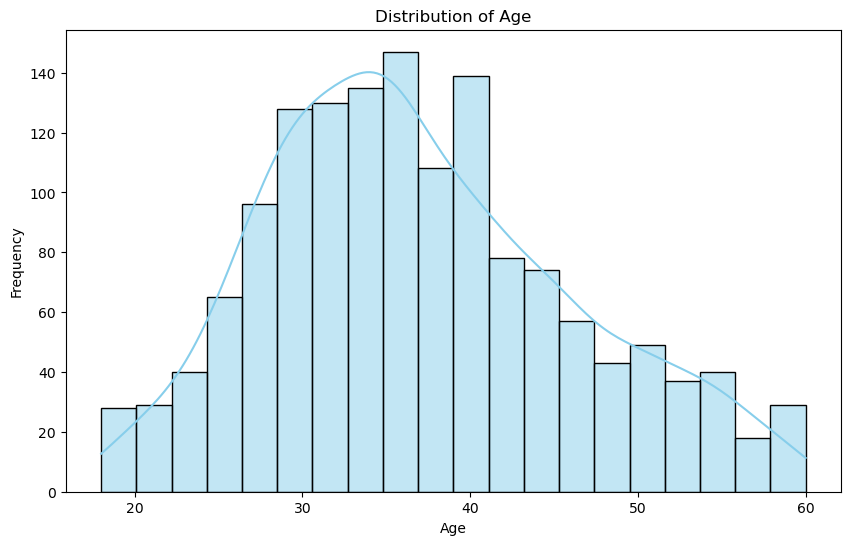

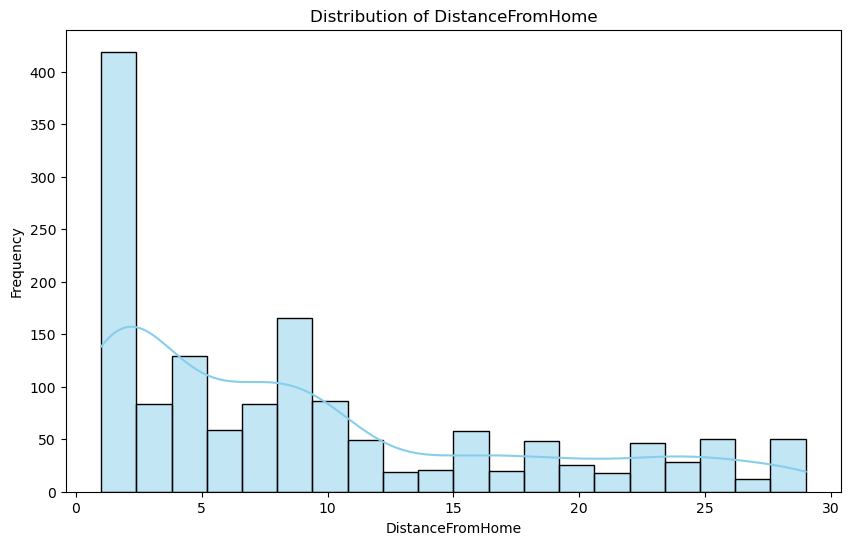

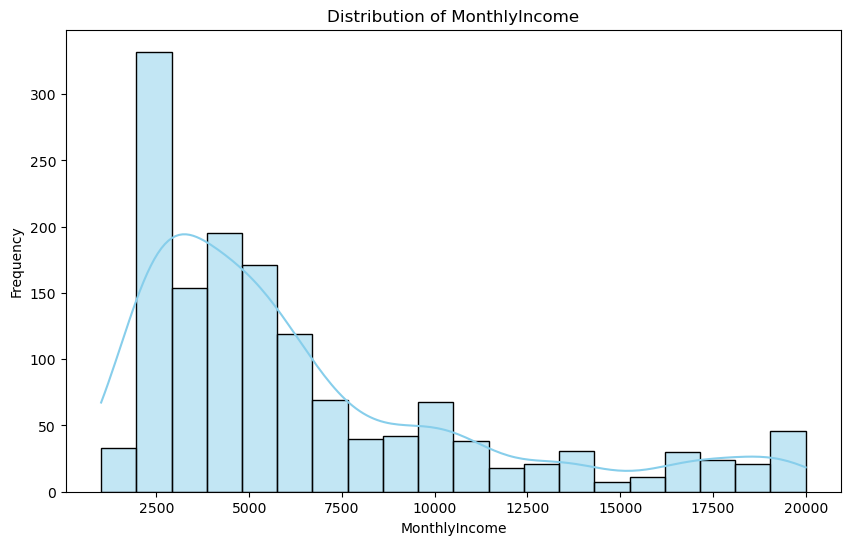

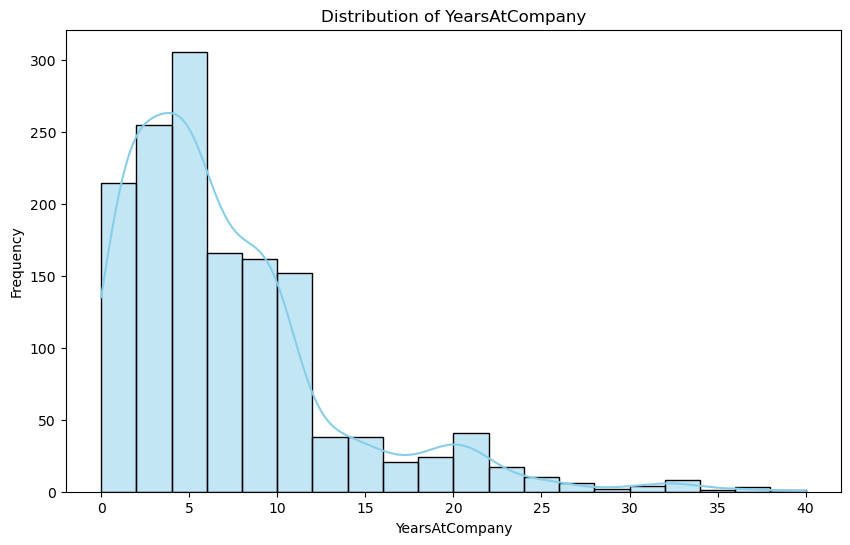

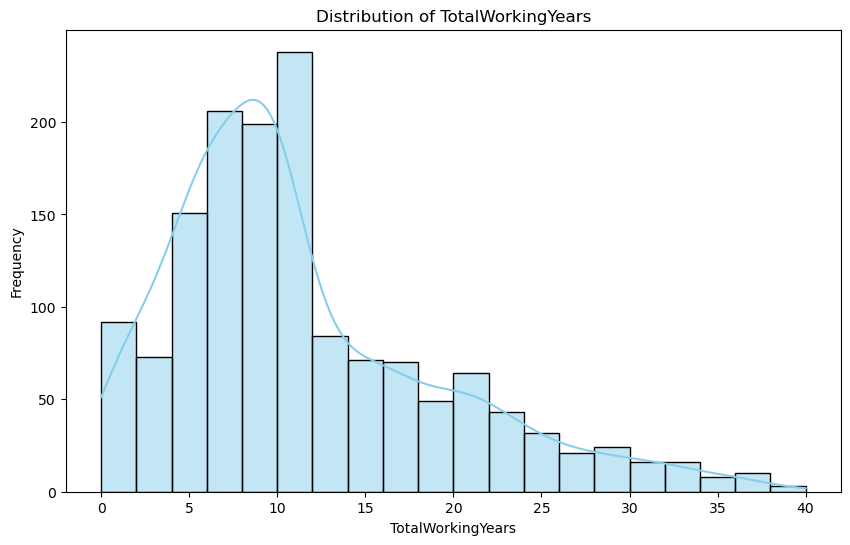

In [18]:
plot_distribution_with_kde(employee_df, 'Age')
plot_distribution_with_kde(employee_df, 'DistanceFromHome')
plot_distribution_with_kde(employee_df, 'MonthlyIncome')
plot_distribution_with_kde(employee_df, 'YearsAtCompany')
plot_distribution_with_kde(employee_df, 'TotalWorkingYears')

Age: The distribution of ages appears to be fairly uniform, with a slight concentration of employees in their 30s and 40s.

DistanceFromHome: Most employees live relatively close to their workplace, with a higher frequency of employees living within a short distance (less than 10 units).

TotalWorkingYears: The distribution is skewed towards fewer total working years, indicating that many employees have less experience.

MonthlyIncome: The distribution of monthly income is right-skewed, with most employees earning between 2000 and 5000, but with some outliers earning much more.

YearsAtCompany: This distribution shows that many employees have been at the company for a relatively short period, with fewer employees having long tenures.

## 2.2 Categorical variables
The categorical variables will be summarized to understand their distribution

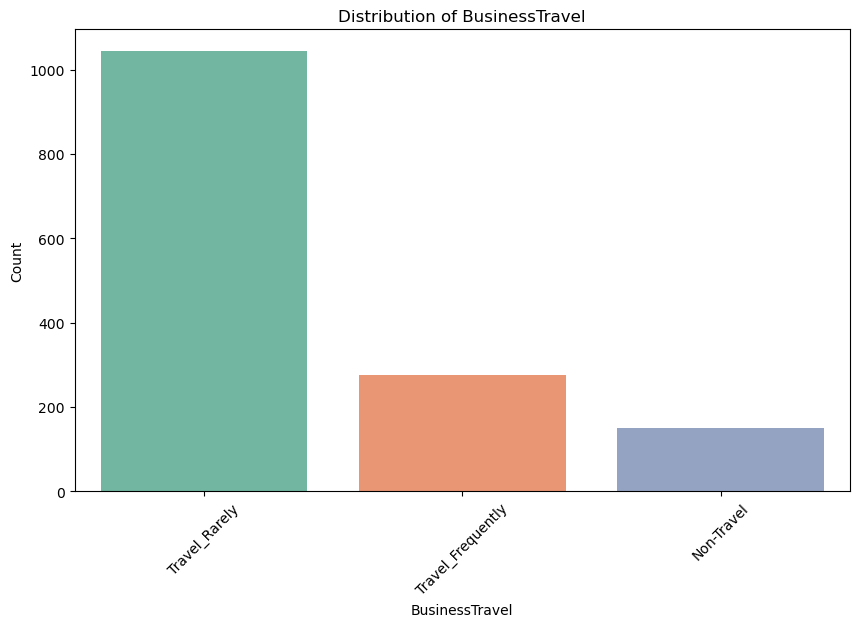

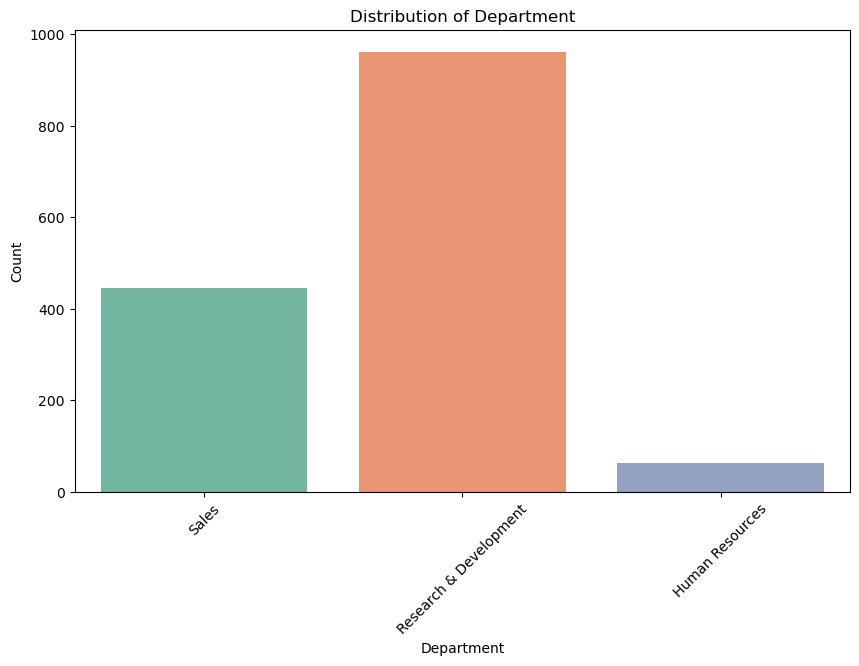

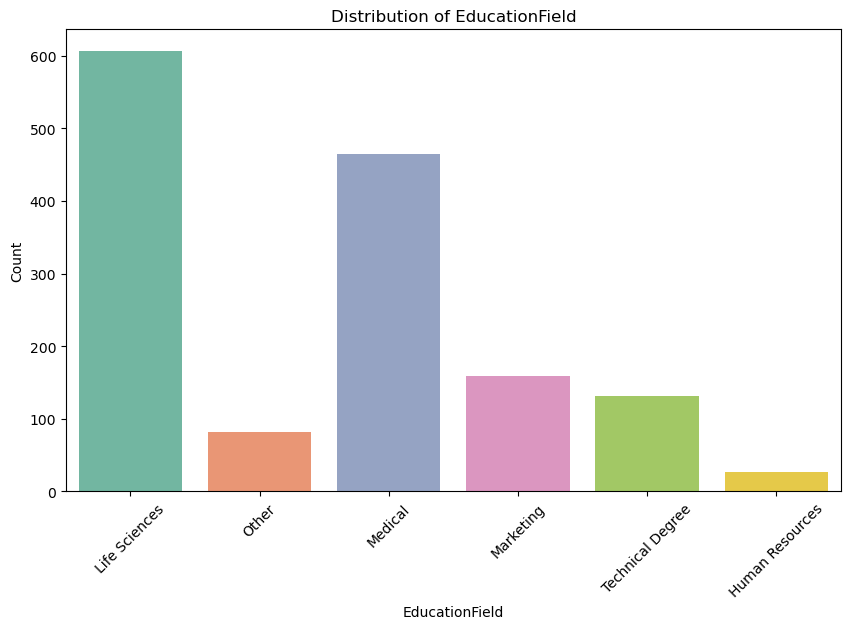

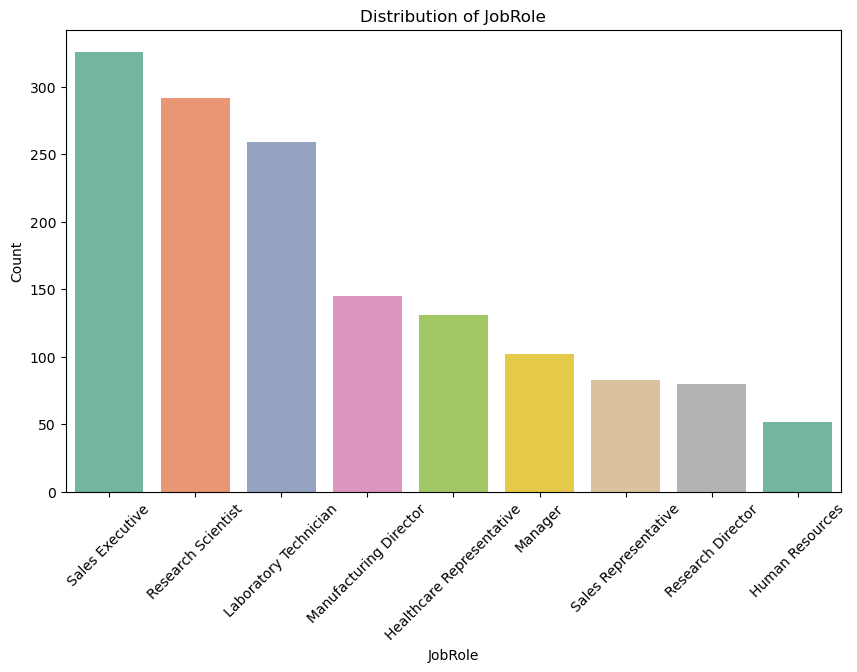

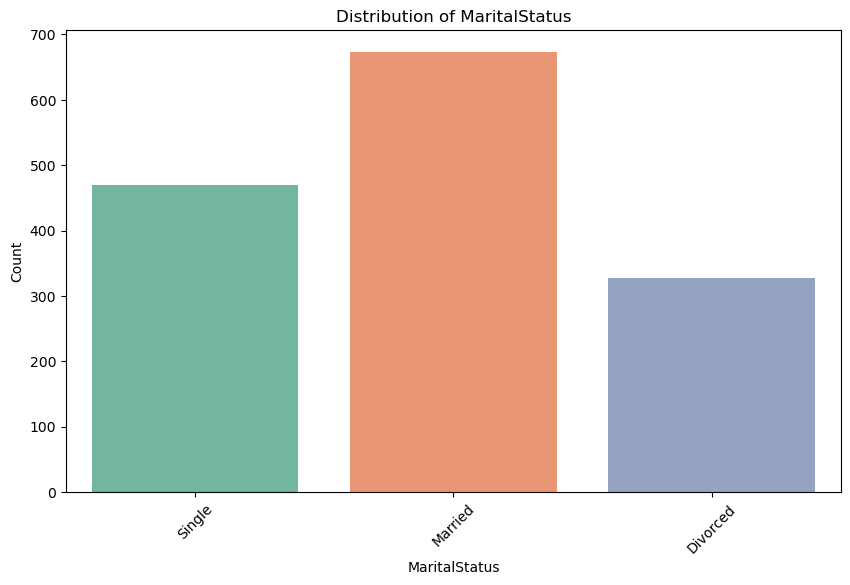

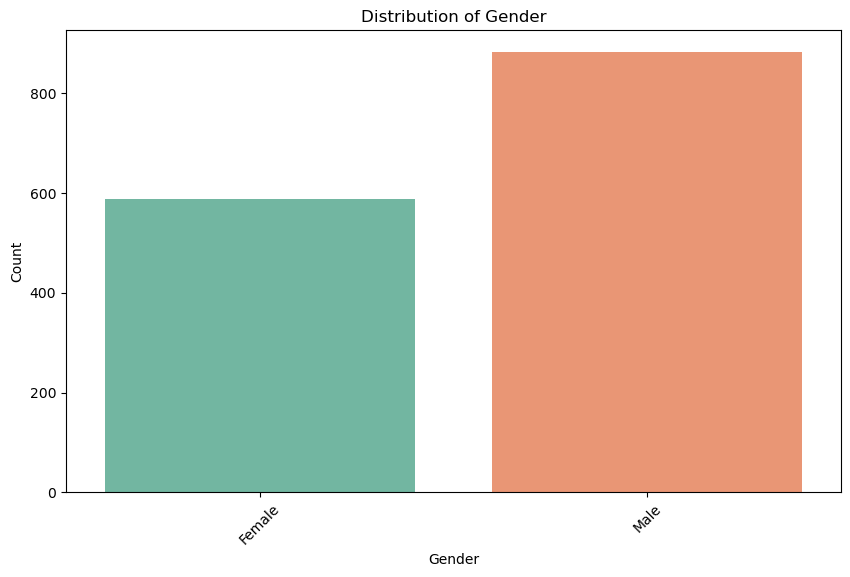

In [19]:
plot_categorical_distribution(employee_df, 'BusinessTravel')
plot_categorical_distribution(employee_df, 'Department')
plot_categorical_distribution(employee_df, 'EducationField')
plot_categorical_distribution(employee_df, 'JobRole')
plot_categorical_distribution(employee_df, 'MaritalStatus')
plot_categorical_distribution(employee_df, 'Gender')

BusinessTravel: Most employees rarely travel for business, with fewer traveling frequently or not at all.  

Department: The majority of employees work in the Research & Development department, followed by Sales and Human Resources.

EducationField: The most common field of education is Life Sciences, followed by Medical and Marketing.

JobRole: Employees are spread across a variety of job roles, with the most common being Sales Executive and Research Scientist.

MaritalStatus: The dataset has a fairly even distribution of employees who are married, single, or divorced.

Gender: There is a slightly higher number of male employees compared to female employees.

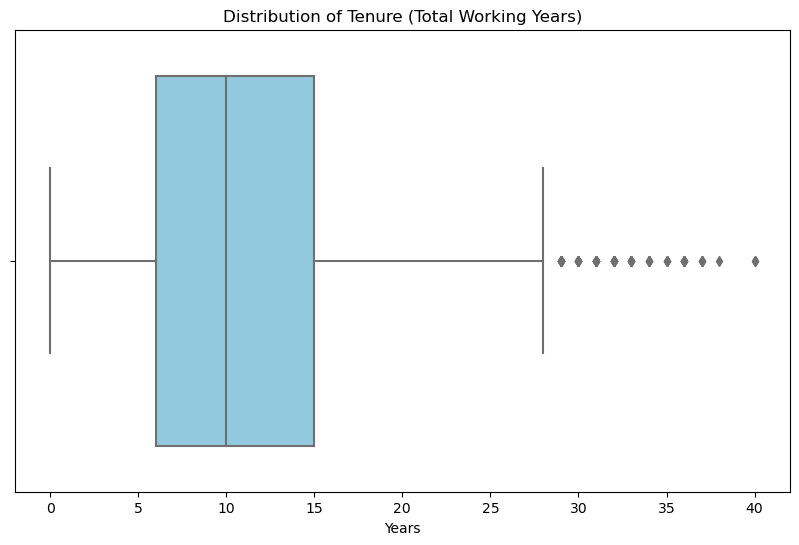

In [20]:
plt.figure(figsize=(10, 6))

# Create the boxplot for Total Working Years
sns.boxplot(x=employee_df['TotalWorkingYears'], color='skyblue')

# Set the title and labels
plt.title('Distribution of Tenure (Total Working Years)')
plt.xlabel('Years')

# Save the plot to a file
plt.savefig('boxplot_of_TotalWorkingYears.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [21]:
department_counts = employee_df['Department'].value_counts()
jobrole_counts = employee_df['JobRole'].value_counts()
attrition_counts = employee_df['Attrition'].value_counts()

fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

# First donut chart - Department
fig.add_trace(go.Pie(labels=department_counts.index, values=department_counts.values, hole=.5), 1, 1)

# Second donut chart - Job Role
fig.add_trace(go.Pie(labels=jobrole_counts.index, values=jobrole_counts.values, hole=.5), 1, 2)

# Third donut chart - Attrition
fig.add_trace(go.Pie(labels=['No Attrition', 'Attrition'], values=attrition_counts.values, hole=.5), 1, 3)

fig.update_layout(
    title_text="Donut Charts: Department, Job Role, and Attrition",
    annotations=[dict(text='Department', x=0.11, y=0.5, font_size=15, showarrow=False),
                 dict(text='Job Role', x=0.5, y=0.5, font_size=15, showarrow=False),
                 dict(text='Attrition', x=0.89, y=0.5, font_size=15, showarrow=False)]
)

fig.show()

## 3. Bivariate Analysis

### 3.1. Demographics vs. Attrition

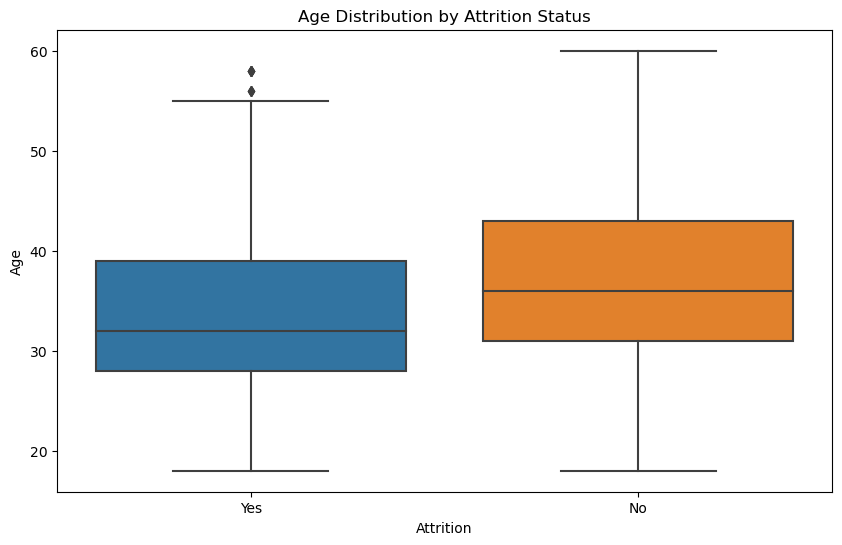

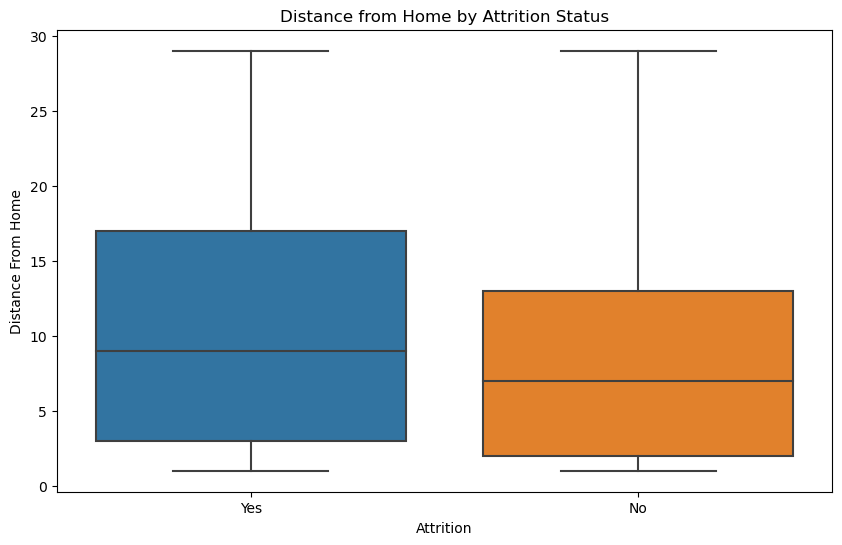

In [22]:
# Boxplot for Age vs. Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Age', data=employee_df)
plt.title('Age Distribution by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

# Boxplot for DistanceFromHome vs. Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=employee_df)
plt.title('Distance from Home by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Distance From Home')
plt.show()

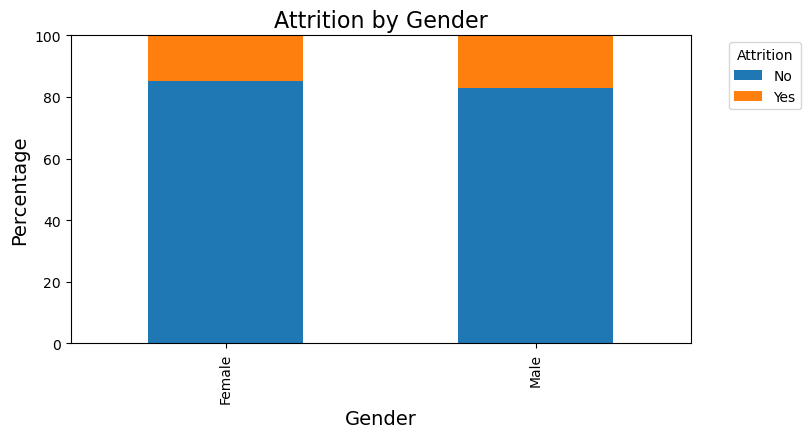

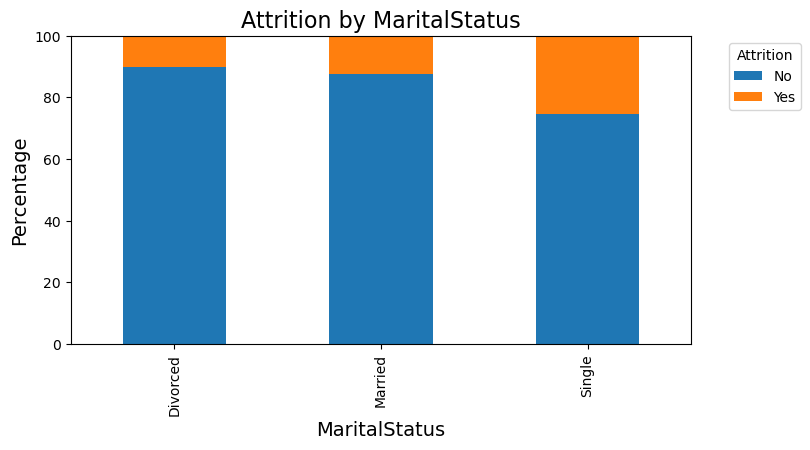

In [23]:
demographic_columns = ['Gender', 'MaritalStatus']

# Generate stacked bar plots for each categorical demographic variable
for column in demographic_columns:
    crosstab = pd.crosstab(employee_df[column], employee_df['Attrition'], normalize='index') * 100
    
    crosstab.plot(kind='bar', stacked=True, figsize=(8, 4))
    
    plt.title(f'Attrition by {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Percentage', fontsize=14)
    plt.legend(title='Attrition', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.ylim(0, 100)
    
    plt.show()

### 3.2. Job-Related Factors vs. Attrition:

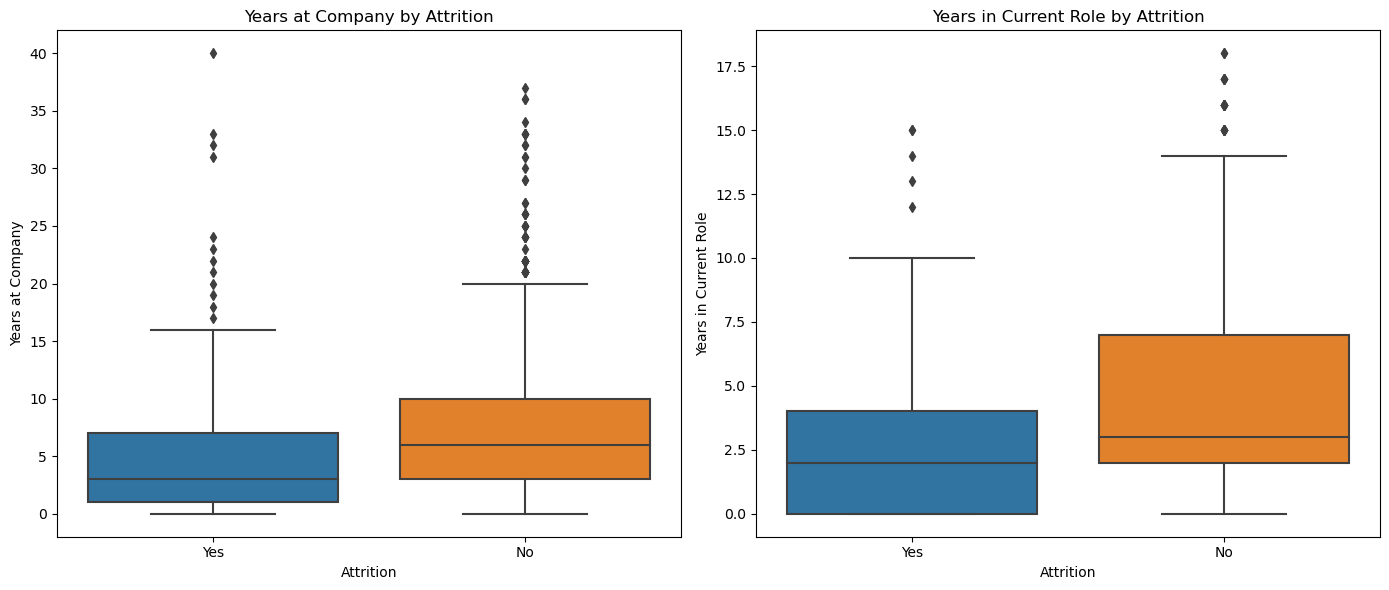

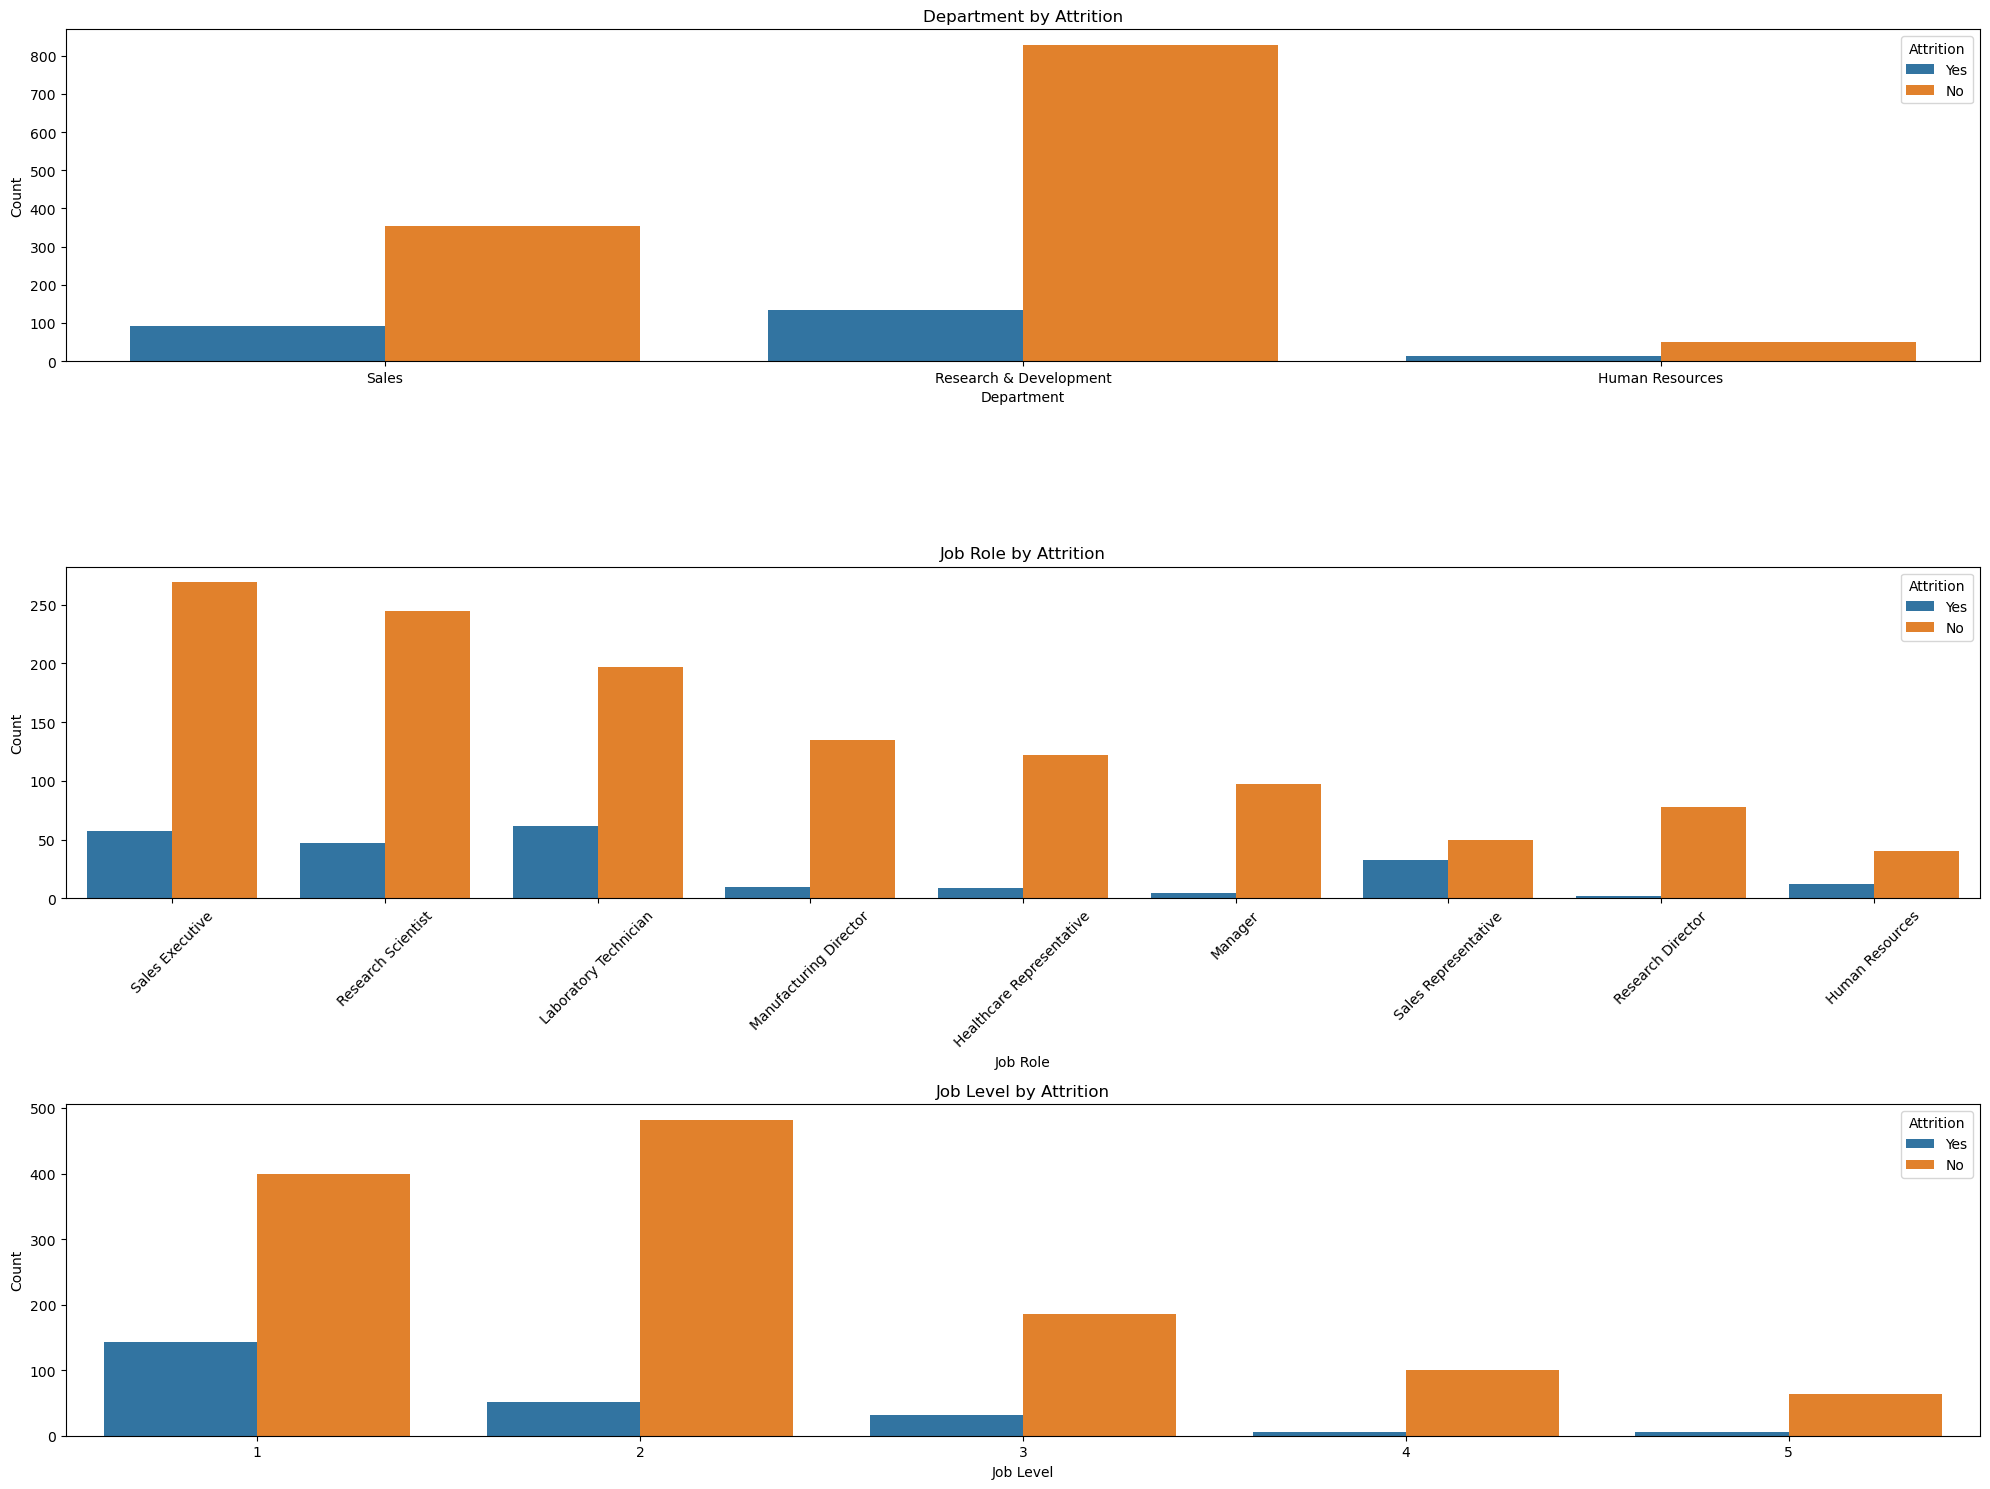

In [24]:
# Box plots for YearsAtCompany and YearsInCurrentRole by Attrition
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Attrition', y='YearsAtCompany', data=employee_df)
plt.title('Years at Company by Attrition')
plt.ylabel('Years at Company')
plt.xlabel('Attrition')

plt.subplot(1, 2, 2)
sns.boxplot(x='Attrition', y='YearsInCurrentRole', data=employee_df)
plt.title('Years in Current Role by Attrition')
plt.ylabel('Years in Current Role')
plt.xlabel('Attrition')

plt.tight_layout()
plt.show()

# Bar plots for JobRole, Department, and JobLevel by Attrition

plt.figure(figsize=(20, 15))

plt.subplot(3, 1, 1)
sns.countplot(x='Department', hue='Attrition', data=employee_df)
plt.title('Department by Attrition')
plt.ylabel('Count')
plt.savefig('department.png', dpi=300, bbox_inches='tight')
plt.xlabel('Department')

plt.subplot(3, 1, 2)
sns.countplot(x='JobRole', hue='Attrition', data=employee_df)
plt.title('Job Role by Attrition')
plt.ylabel('Count')
plt.xlabel('Job Role')
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
sns.countplot(x='JobLevel', hue='Attrition', data=employee_df)
plt.title('Job Level by Attrition')
plt.ylabel('Count')
plt.xlabel('Job Level')

plt.tight_layout()
plt.show()

Years at Company by Attrition:

Employees who have left (Attrition = Yes) tend to have fewer years at the company compared to those who stayed. This suggests that employees with shorter tenures may be more likely to leave.
Years in Current Role by Attrition:

Similar to the "Years at Company" variable, employees who left tend to have spent fewer years in their current role. This might indicate that employees who have not been in their current role for long are more prone to attrition.

Job Role by Attrition:

Certain job roles, such as "Sales Executive" and "Laboratory Technician," have higher counts of attrition. This could suggest that these roles are more prone to employee turnover.
Department by Attrition:

The "Sales" department has a higher proportion of attrition compared to "Research & Development" and "Human Resources." This indicates that employees in the Sales department may be more likely to leave.
Job Level by Attrition:

Attrition appears to be more common in lower job levels (Level 1), while higher levels show fewer cases of attrition. This could imply that employees in lower job levels might be more vulnerable to leaving.

Tenure-Related Factors: Shorter tenure both at the company and in the current role is associated with higher attrition, indicating that newer employees or those who have not settled into their roles may be at higher risk of leaving.

Job Role and Department: Certain roles and departments, particularly those associated with Sales, show higher attrition rates. This could be a focal point for addressing turnover issues.

Job Level: Employees at lower job levels are more likely to leave, which could suggest dissatisfaction or better opportunities elsewhere for these employees.

### 3.3.  Satisfaction-Related Factors vs. Attrition

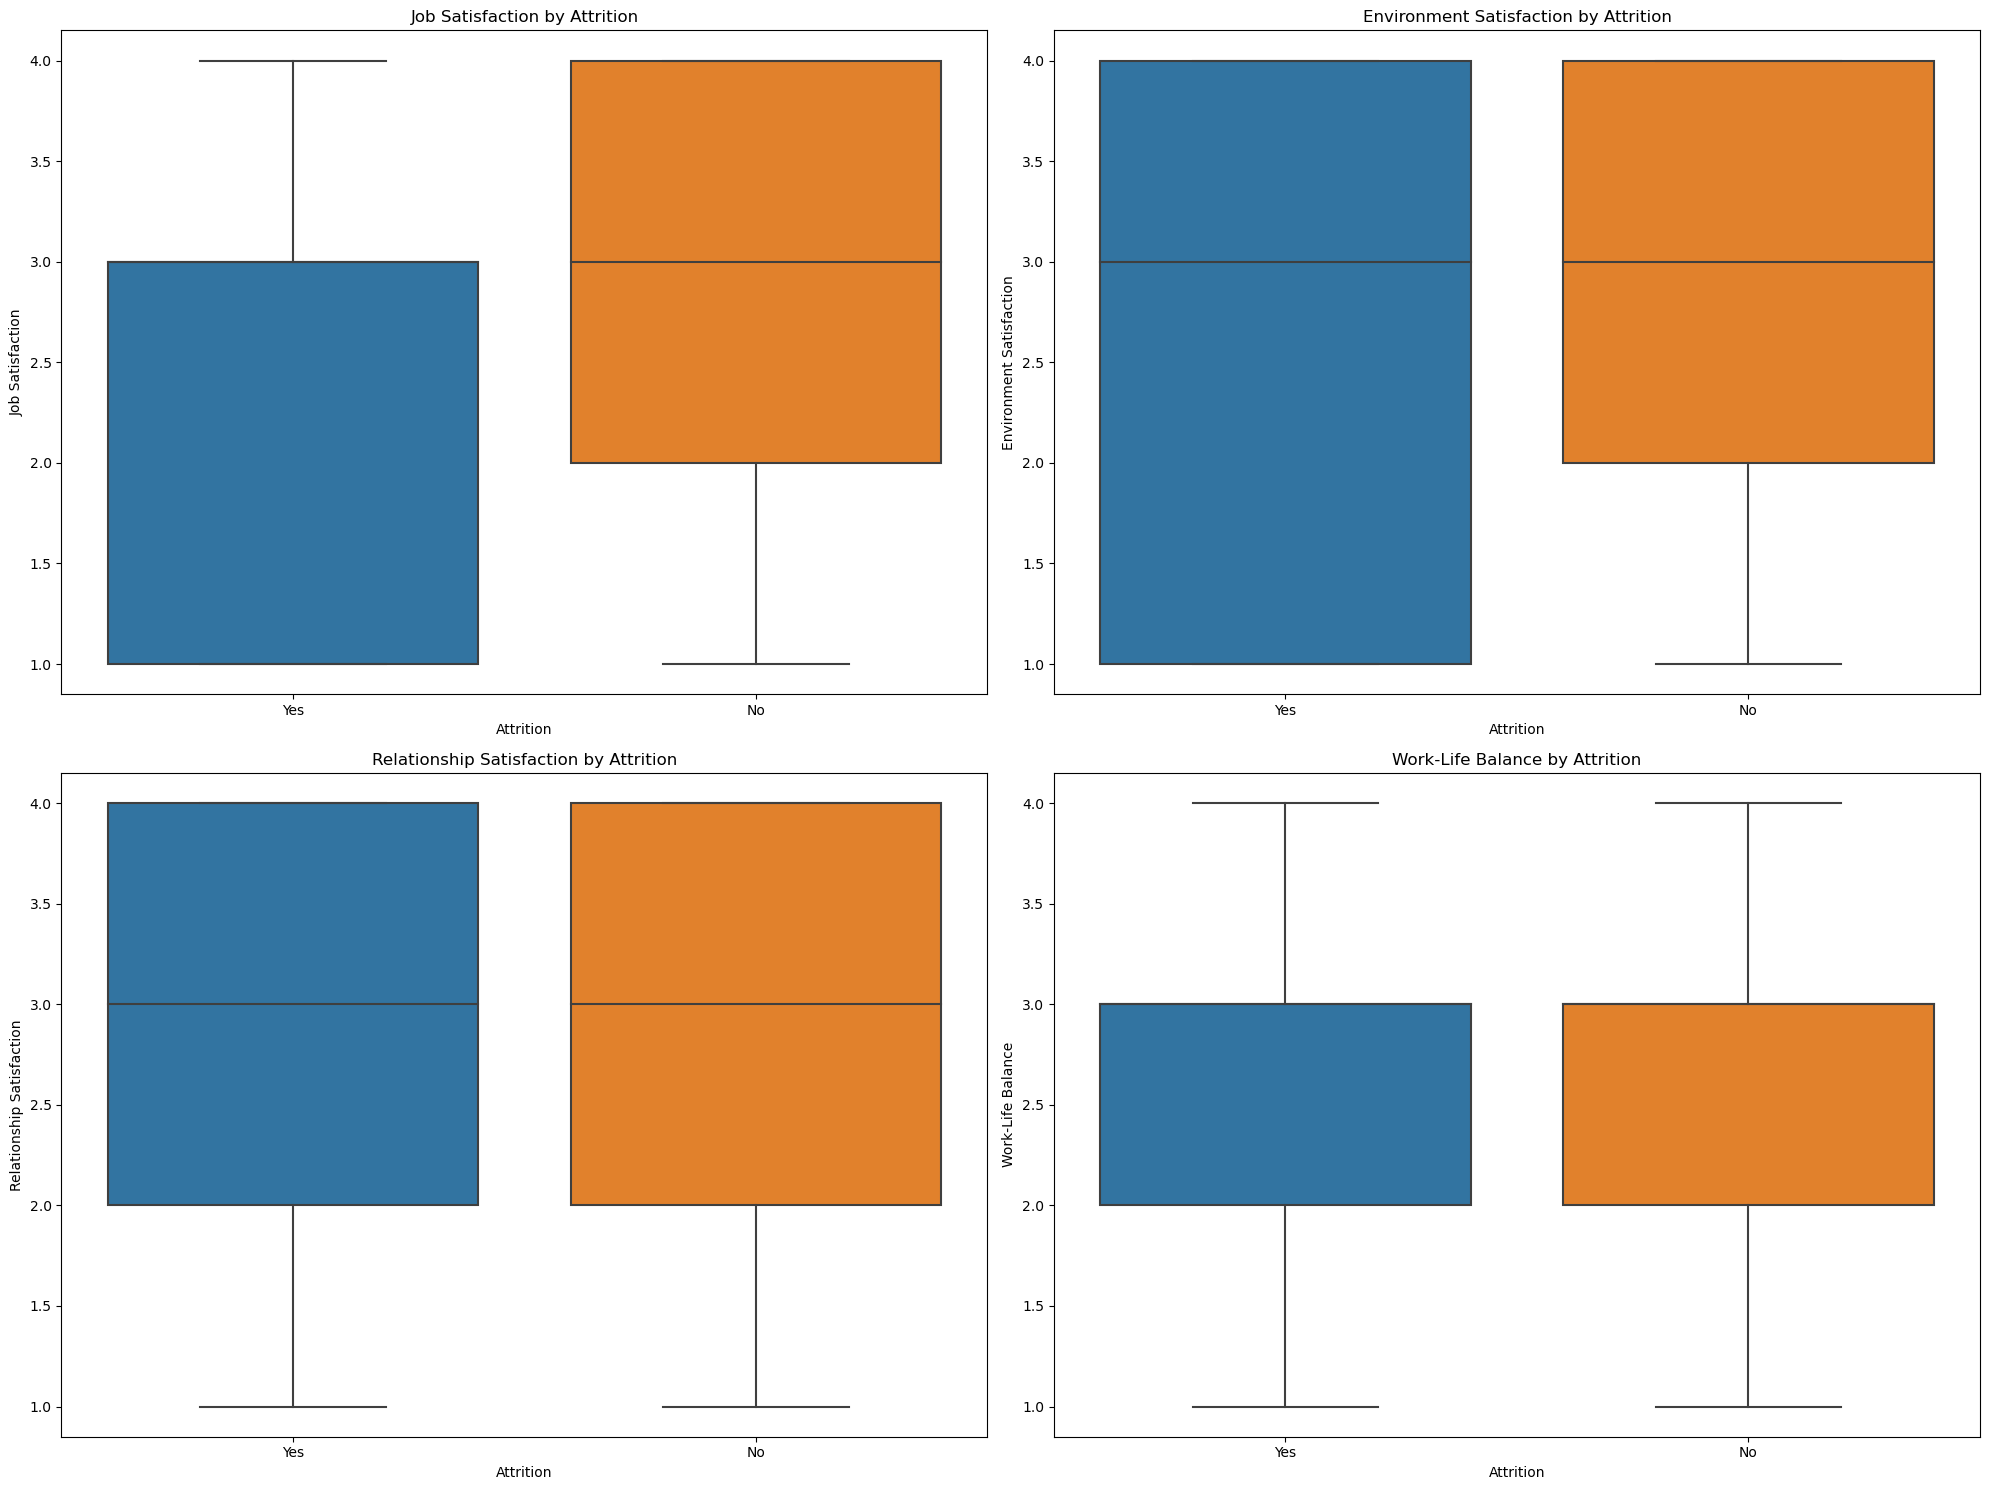

In [25]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
sns.boxplot(x='Attrition', y='JobSatisfaction', data=employee_df)
plt.title('Job Satisfaction by Attrition')
plt.ylabel('Job Satisfaction')
plt.xlabel('Attrition')

plt.subplot(2, 2, 2)
sns.boxplot(x='Attrition', y='EnvironmentSatisfaction', data=employee_df)
plt.title('Environment Satisfaction by Attrition')
plt.ylabel('Environment Satisfaction')
plt.xlabel('Attrition')

plt.subplot(2, 2, 3)
sns.boxplot(x='Attrition', y='RelationshipSatisfaction', data=employee_df)
plt.title('Relationship Satisfaction by Attrition')
plt.ylabel('Relationship Satisfaction')
plt.xlabel('Attrition')

plt.subplot(2, 2, 4)
sns.boxplot(x='Attrition', y='WorkLifeBalance', data=employee_df)
plt.title('Work-Life Balance by Attrition')
plt.ylabel('Work-Life Balance')
plt.xlabel('Attrition')

plt.tight_layout()
plt.show()


In [26]:
satisfaction_factors = ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']

# Calculate median
median_values = employee_df.groupby('Attrition')[satisfaction_factors].median()
median_values

JobSatisfaction  EnvironmentSatisfaction  RelationshipSatisfaction  \
Attrition                                                                       
No                     3.0                      3.0                       3.0   
Yes                    3.0                      3.0                       3.0   

           WorkLifeBalance  
Attrition                   
No                     3.0  
Yes                    3.0

Job Satisfaction:

The median job satisfaction is the same for both employees who left and those who stayed (3.0). This suggests that at the median level, job satisfaction does not differentiate between the two groups.
Implication: Job satisfaction at the median level might not be a strong factor in attrition, meaning that other aspects of job satisfaction (e.g., lower satisfaction levels or variability in satisfaction) might be more critical to understanding why employees leave.

Environment Satisfaction:

Median Insight: The median environment satisfaction is also the same for both groups (3.0). This indicates that, like job satisfaction, environment satisfaction at the median level does not distinguish between employees who leave and those who stay.
Implication: Similar to job satisfaction, environment satisfaction might influence attrition more significantly at the extremes (e.g., very low satisfaction), which the median does not capture.
Relationship Satisfaction:

Median Insight: The median relationship satisfaction is identical for both groups (3.0). This suggests that, in general, relationship satisfaction does not differ between those who leave and those who stay, at least at the median level.
Implication: The overall quality of workplace relationships might not be a primary factor in attrition unless there are significant outliers or lower quartile values that need closer examination.

Work-Life Balance:

Median Insight: The median work-life balance score is again the same for both groups (3.0). This indicates that work-life balance, like the other factors, does not show a difference at the median level.
Implication: Similar to the other satisfaction factors, work-life balance might impact attrition more at the extremes or lower satisfaction levels.

Corrected Overall Insight:

No Differences at the Median Level: Since the median values are the same for all satisfaction factors across employees who stayed and those who left, median satisfaction alone does not seem to explain attrition. This suggests that other factors, such as those at the lower end of the satisfaction scale or variability in satisfaction levels, might be more important to explore.

In [27]:
lower_quartile_values = employee_df.groupby('Attrition')[['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']].quantile(0.25)
lower_quartile_values

JobSatisfaction  EnvironmentSatisfaction  RelationshipSatisfaction  \
Attrition                                                                       
No                     2.0                      2.0                       2.0   
Yes                    1.0                      1.0                       2.0   

           WorkLifeBalance  
Attrition                   
No                     2.0  
Yes                    2.0

Job Satisfaction:

Employees Who Stayed: 2.0
Employees Who Left: 1.0
Insight: Employees who left the company tend to have lower job satisfaction at the 25th percentile, indicating that those with very low job satisfaction are more likely to leave.

Environment Satisfaction:

Employees Who Stayed: 2.0
Employees Who Left: 1.0
Insight: Similarly, the environment satisfaction is lower at the 25th percentile for those who left, suggesting that dissatisfaction with the work environment is a factor in attrition.

Relationship Satisfaction:

Employees Who Stayed: 2.0
Employees Who Left: 2.0
Insight: The 25th percentile for relationship satisfaction is the same for both groups, indicating that relationship satisfaction might not play as significant a role in attrition as job and environment satisfaction.

Work-Life Balance:

Employees Who Stayed: 2.0
Employees Who Left: 2.0
Insight: The lower quartile value for work-life balance is the same for both groups, suggesting that at the lower end of the scale, work-life balance might not be a distinguishing factor in attrition.

## 4. Correlation Analysis

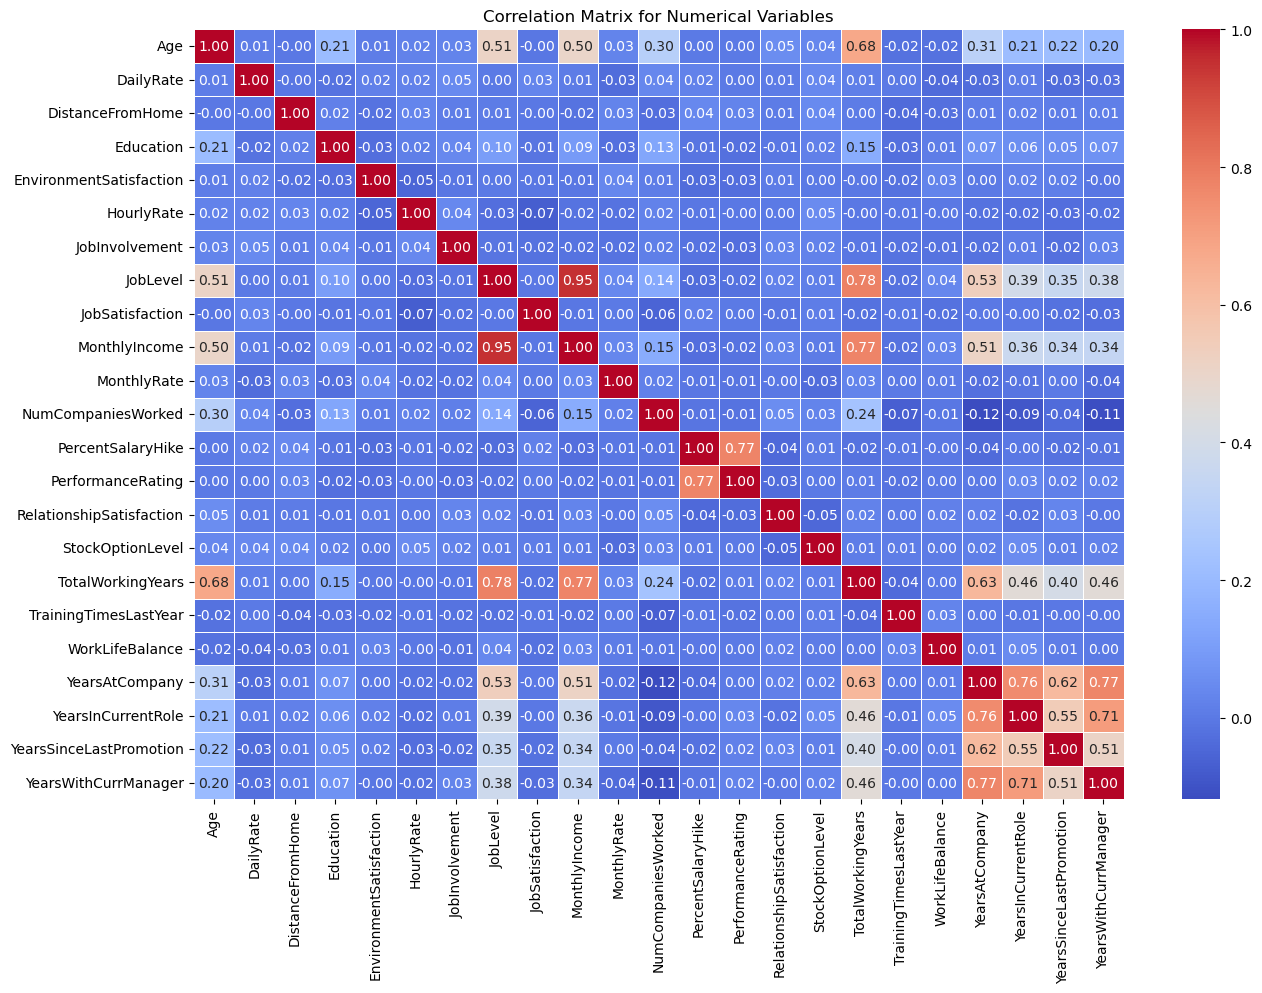

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
StockOptionLevel                         0.003432    0.050263        0.021523   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   

                          JobLevel  JobSatisfaction  MonthlyIncome  ...  \
Age                       0.509604        -0.004892       0.497855  ...   
DailyRate                 0.002966         0.030571       0.007

In [28]:
correlation_matrix = employee_df.corr(numeric_only=True)

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

correlation_matrix

Coefficients Relationship strength

0.00 No relationship

0.01 – 0.09 Very Weak

0.10 – 0.29 Weak

0.30 – 0.49 Moderate

0.50 – 0.69 Strong

0.70 – 0.89 Very Strong

>= 0.90 Near Perfect

https://www.inass.org/2019/2019123108.pdf  
    
Sabilla, S., Sarno, R., & Triyana, K. (2019). "Optimizing Threshold using Pearson Correlation for Selecting Features of Electronic Nose Signals." International Journal of Industrial Engineering and Management, DOI: 10.22266/ijies2019.1231.08.

#### Very Strong Correlations

Very Strong Correlations invloving Job Level and Monthly Income (0.95)

Very Strong Correlations Involving YearsAtCompany, YearsInCurrentRole, and YearsWithCurrManager:

YearsAtCompany and YearsWithCurrManager (0.77)
YearsInCurrentRole and YearsWithCurrManager (0.71)

These variables show very strong correlations with each other, indicating a lot of overlapping information. For example, employees who have been with the company for a long time are likely to have spent significant time in their current role and with their current manager. 

These variables are likely redundant. I would consider dimensionality reduction techniques like PCA.

#### Strong Correlations

Age and TotalWorkingYears (0.68) - As expected, older employees tend to have more years of working experience. This correlation is strong and indicates that these two variables are closely related. In terms of employee attrition, it might suggest that employees with more experience (and thus potentially older) might have different attrition patterns than younger, less experienced employees.

MonthlyIncome and JobLevel (0.51) - Higher job levels are strongly associated with higher income. This could be a significant factor in understanding attrition. Employees at higher job levels with higher incomes might have different motivations for staying or leaving compared to those at lower levels.

#### Weak Correlations

Variables like JobSatisfaction, EnvironmentSatisfaction, and RelationshipSatisfaction show weaker correlations with other numerical variables. Despite their weak correlation values, these variables might still be important for predicting attrition because they measure subjective aspects of the work experience that are not directly captured by other metrics.

## 5. Multivariate Analysis

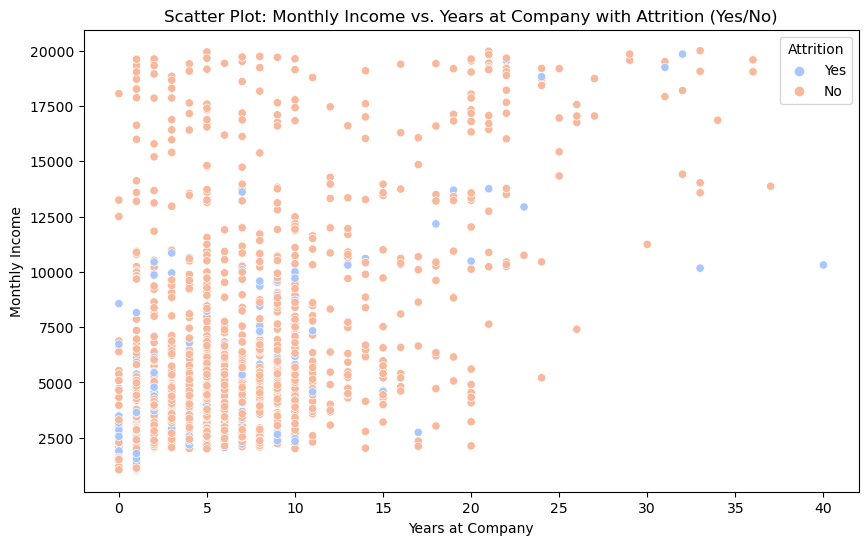

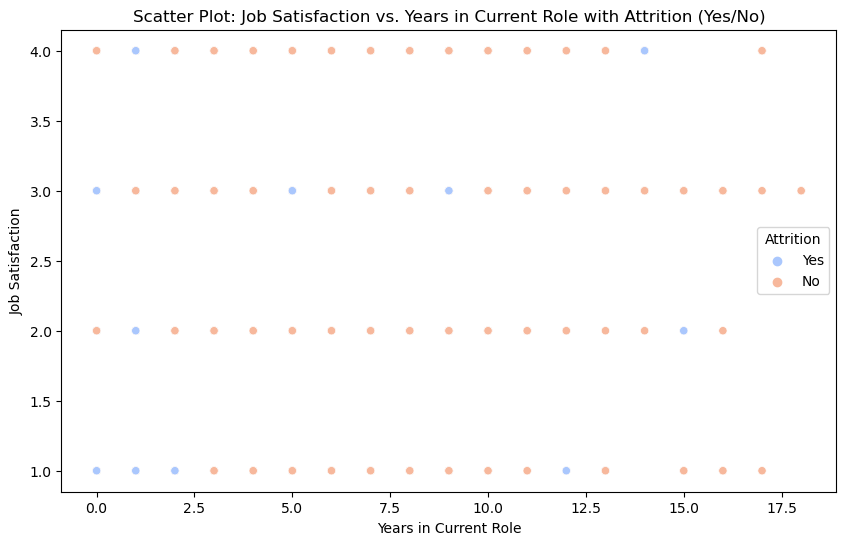

In [29]:
# Scatter plot: Monthly Income vs. Years at Company with Attrition as hue (Yes/No)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsAtCompany', y='MonthlyIncome', hue='Attrition', palette='coolwarm', data=employee_df)
plt.title('Scatter Plot: Monthly Income vs. Years at Company with Attrition (Yes/No)')
plt.xlabel('Years at Company')
plt.ylabel('Monthly Income')
plt.show()

# Scatter plot: Job Satisfaction vs. Years in Current Role with Attrition as hue (Yes/No)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsInCurrentRole', y='JobSatisfaction', hue='Attrition', palette='coolwarm', data=employee_df)
plt.title('Scatter Plot: Job Satisfaction vs. Years in Current Role with Attrition (Yes/No)')
plt.xlabel('Years in Current Role')
plt.ylabel('Job Satisfaction')
plt.show()

Employees who have been at the company for fewer years and earn less appear to be more likely to leave, although there are also some employees with higher income and longer tenure who have left. This suggests that while tenure and income are factors, they might not be the sole determinants of attrition.

Employees with lower job satisfaction are more likely to leave, regardless of how long they have been in their current role. This reinforces the idea that dissatisfaction can be a strong driver of attrition.

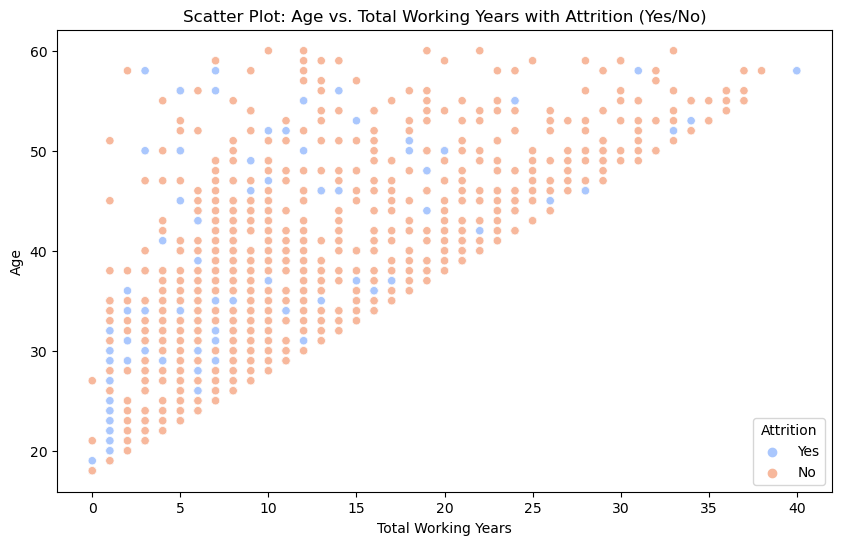

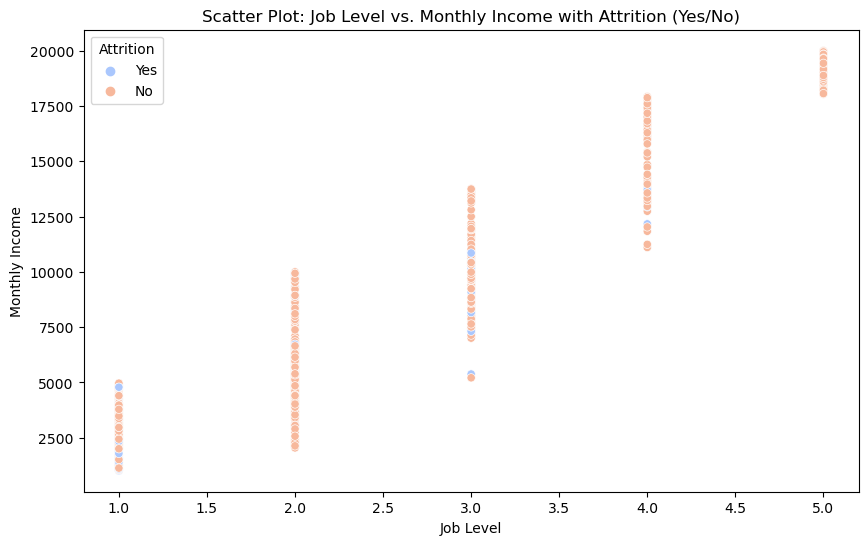

In [30]:
# Scatter plot: Age vs. Total Working Years with Attrition as hue (Yes/No)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalWorkingYears', y='Age', hue='Attrition', palette='coolwarm', data=employee_df)
plt.title('Scatter Plot: Age vs. Total Working Years with Attrition (Yes/No)')
plt.xlabel('Total Working Years')
plt.ylabel('Age')
plt.show()

# Scatter plot: Job Level vs. Monthly Income with Attrition as hue (Yes/No)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='JobLevel', y='MonthlyIncome', hue='Attrition', palette='coolwarm', data=employee_df)
plt.title('Scatter Plot: Job Level vs. Monthly Income with Attrition (Yes/No)')
plt.xlabel('Job Level')
plt.ylabel('Monthly Income')
plt.show()

Scatter Plot: Age vs. Total Working Years:

Observation: There is a clear positive relationship between Age and TotalWorkingYears, which is expected—older employees tend to have more years of working experience.
Attrition Insight: The color coding shows that attrition (Yes) occurs across different age and experience levels, but there might be slightly higher attrition among younger employees with fewer years of experience. This could suggest that less experienced employees are more likely to leave, perhaps due to seeking better opportunities or dissatisfaction with their early career progression.

Scatter Plot: Job Level vs. Monthly Income:

Observation: As expected, JobLevel correlates positively with MonthlyIncome. Higher job levels correspond to higher income.
Attrition Insight: Attrition (Yes) occurs across all job levels and income levels, but there may be a concentration of attrition among those at lower job levels with lower income. This suggests that lower-level, lower-paid employees might be more susceptible to leaving, potentially seeking better-paying opportunities or career advancement elsewhere.

Certain variables, like job level and income, or age and experience, play significant roles in attrition. The visualizations also indicate that attrition is more common among younger, less experienced, and lower-paid employees.

### 6. Outlier analysis

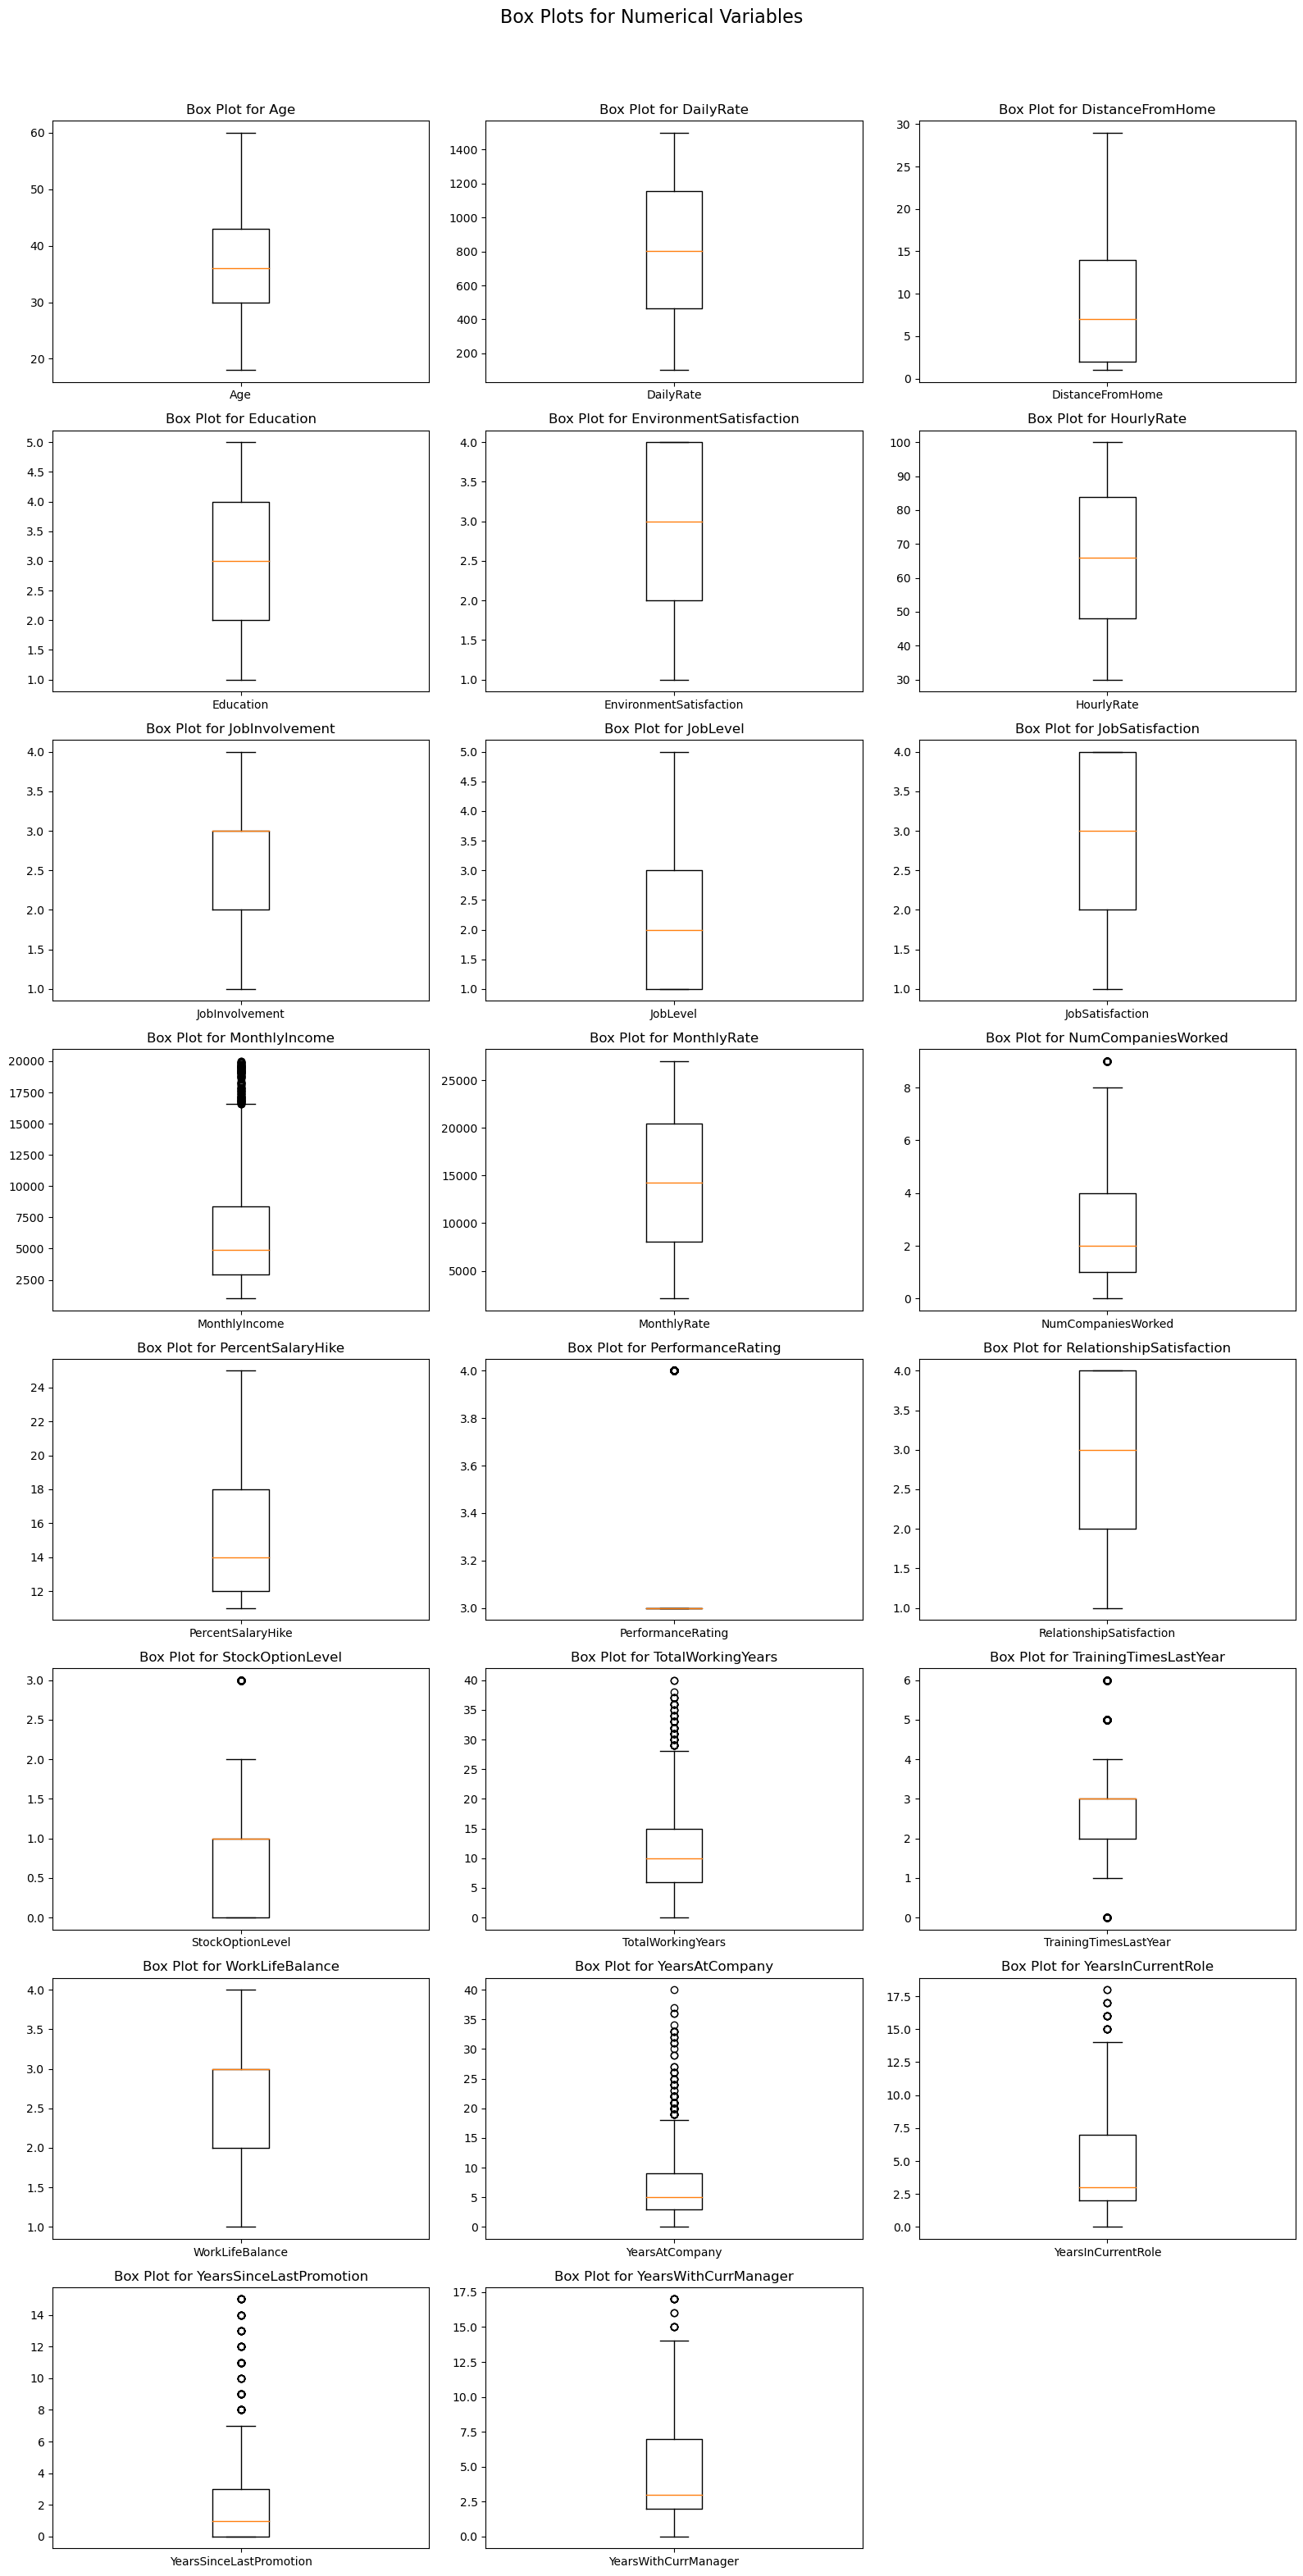

In [31]:
numerical_columns = employee_df.select_dtypes(include=['float64', 'int64']).columns

num_cols = 3  
num_rows = math.ceil(len(numerical_columns) / num_cols) 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))
fig.suptitle('Box Plots for Numerical Variables', fontsize=16)

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    axes[i].boxplot(employee_df[col].dropna())
    axes[i].set_title(f'Box Plot for {col}')
    axes[i].set_xticks([1])
    axes[i].set_xticklabels([col])

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

Monthly Income: There are significant outliers in the MonthlyIncome variable, with several employees earning a lot more than the general range.

Years at Company and Years Since Last Promotion: These variables show a noticeable number of outliers, indicating some employees have been with the company or without a promotion for significantly longer than others.

Years in Current Role: Similar to tenure, some employees have been in their current role for an extended period, which could indicate stagnation.

Total Working Years: There are employees with much higher total working years, which might correlate with higher salaries or other factors.

Performance Rating: There are few outliers in PerformanceRating, possibly indicating a few employees who received significantly different evaluations.

In [32]:
# Selected variables with identified outliers
outlier_vars = ['MonthlyIncome', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsInCurrentRole', 'TotalWorkingYears', 'PerformanceRating']

# Calculate descriptive statistics (mean, median, standard deviation, min, max)
descriptive_stats = employee_df[outlier_vars].describe().T
descriptive_stats = descriptive_stats[['mean', '50%', 'std', 'min', 'max']]
descriptive_stats.columns = ['Mean', 'Median', 'Standard Deviation', 'Min', 'Max']

descriptive_stats

Mean  Median  Standard Deviation     Min  \
MonthlyIncome            6502.931293  4919.0         4707.956783  1009.0   
YearsAtCompany              7.008163     5.0            6.126525     0.0   
YearsSinceLastPromotion     2.187755     1.0            3.222430     0.0   
YearsInCurrentRole          4.229252     3.0            3.623137     0.0   
TotalWorkingYears          11.279592    10.0            7.780782     0.0   
PerformanceRating           3.153741     3.0            0.360824     3.0   

                             Max  
MonthlyIncome            19999.0  
YearsAtCompany              40.0  
YearsSinceLastPromotion     15.0  
YearsInCurrentRole          18.0  
TotalWorkingYears           40.0  
PerformanceRating            4.0

Monthly Income:

Mean: 6,502.93  
Median: 4,919.00  
Standard Deviation: 4,707.96  
Min: 1,009.00  
Max: 19,999.00  
Insight: The high standard deviation and a maximum value of $19,999 suggest significant variability, with a small group of employees earning far more than the median.

Years at Company:

Mean: 7.01 years  
Median: 5.0 years  
Standard Deviation: 6.13 years  
Min: 0.0 years  
Max: 40.0 years  
Insight: The range from 0 to 40 years, with a substantial standard deviation, indicates that while most employees have a tenure around the median, a few have been with the company for much longer.

Years Since Last Promotion:

Mean: 2.19 years  
Median: 1.0 years  
Standard Deviation: 3.22 years  
Min: 0.0 years  
Max: 15.0 years  
Insight: The presence of employees who haven't had a promotion in up to 15 years is notable and might indicate stagnation for some employees.

Years in Current Role:

Mean: 4.23 years
Median: 3.0 years
Standard Deviation: 3.62 years
Min: 0.0 years
Max: 18.0 years
Insight: Some employees have been in the same role for up to 18 years, which could suggest either stability or a lack of career progression.
Total Working Years:

Mean: 11.28 years  
Median: 10.0 years  
Standard Deviation: 7.78 years  
Min: 0.0 years  
Max: 40.0 years  
Insight: This variable also shows a wide range, with some employees having worked for as long as 40 years, likely correlating with higher salaries or senior positions.

Performance Rating:

Mean: 3.15  
Median: 3.0  
Standard Deviation: 0.36  
Min: 3.0  
Max: 4.0  
Insight: The performance ratings are tightly clustered, with most employees receiving a rating of 3 or 4. Outliers in this variable might represent employees who have been rated particularly high or low.

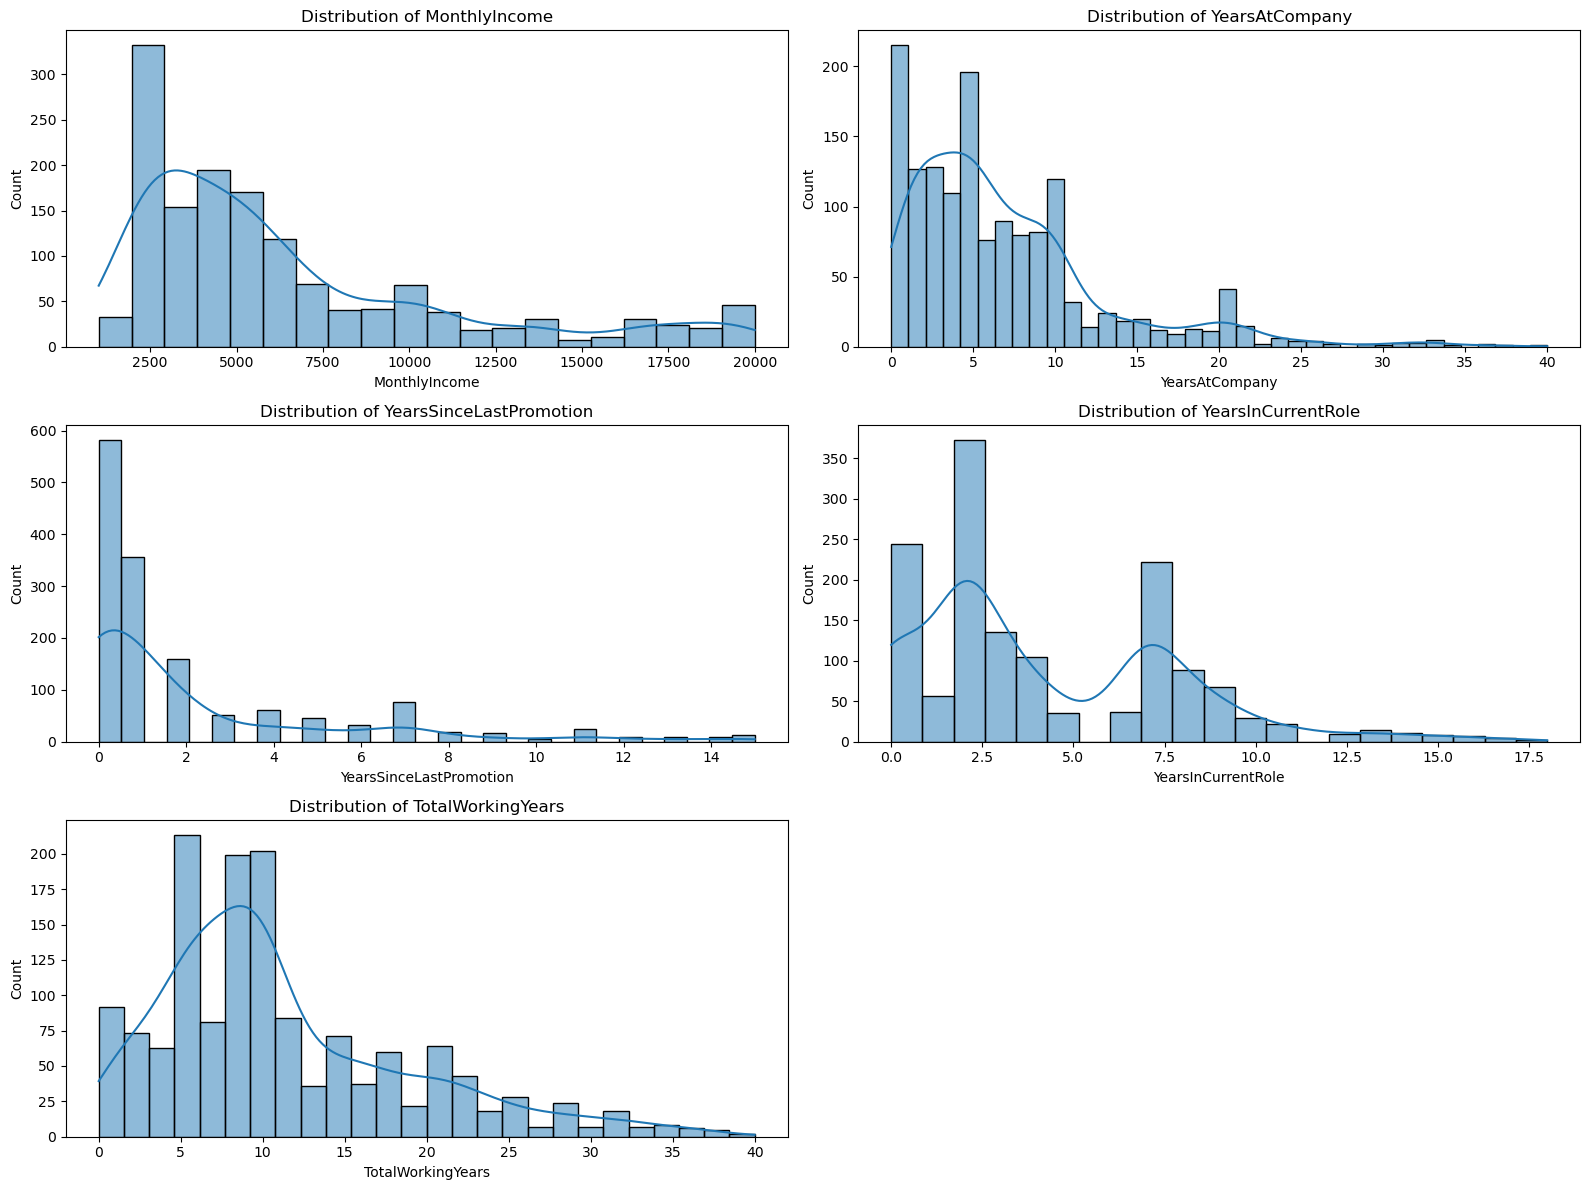

In [33]:
dist_vars = ['MonthlyIncome', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsInCurrentRole', 'TotalWorkingYears']

# Plotting distributions with histograms and KDE
plt.figure(figsize=(16, 12))
for i, var in enumerate(dist_vars, 1):
    plt.subplot(3, 2, i)
    sns.histplot(employee_df[var].dropna(), kde=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

Monthly Income:

Visualization: The distribution of MonthlyIncome is right-skewed, with a long tail extending towards higher income levels. This indicates that most employees earn less than the upper-income outliers.
Insight: The outliers, those earning significantly more than the median, likely represent senior-level positions or high performers. These employees might have different attrition patterns compared to the general population.
Years at Company:

Visualization: The distribution shows a peak around the 5-year mark, with outliers at the high end, where some employees have been with the company for several decades.
Insight: Employees with long tenures may represent either highly loyal individuals or those who may be at risk of leaving due to stagnation. The analysis could explore whether these outliers have a higher or lower attrition rate.
Years Since Last Promotion:

Visualization: This variable is right-skewed, with a significant number of employees not having had a promotion for a long time, up to 15 years.
Insight: Long periods without promotion might correlate with dissatisfaction, potentially leading to higher attrition among these employees.
Years in Current Role:

Visualization: The distribution indicates that while most employees have been in their current role for a few years, there are outliers who have been in the same role for an extended period.
Insight: Extended time in the same role could suggest either stability or a lack of career advancement, which could be factors influencing attrition.
Total Working Years:

Visualization: The distribution is right-skewed, with outliers having up to 40 years of experience.
Insight: These outliers are likely to be senior employees, possibly nearing retirement, which might explain higher attrition in this group.

#### 6.1. Comparing attrition rates of outliers against the general population

Before diving into predictive modeling, it's crucial to understand how different segments of employees behave in relation to attrition. Specifically, we want to examine whether certain groups—like high earners, long-tenured employees, or those with extensive experience—are more or less likely to leave the company.

Segmentation analysis helps us uncover these patterns by comparing attrition rates across different employee segments. By identifying and analyzing outliers within key variables, we can gain deeper insights into which factors contribute to employee stability or turnover.

This analysis is essential for:

Improving Model Accuracy: Understanding the behavior of outliers allows us to engineer features that better capture the nuances in employee retention, leading to more accurate predictive models.
Targeted Interventions: Identifying groups with higher or lower attrition rates enables the organization to develop more targeted retention strategies, focusing resources where they are most needed.
By conducting this segmentation analysis, we aim to ensure that our models are not only predictive but also interpretable and actionable, providing valuable insights into employee attrition dynamics.

In [34]:
# Step 1: Calculate the IQR and Outlier Thresholds
outlier_thresholds = {}

for var in dist_vars:
    Q1 = employee_df[var].quantile(0.25)
    Q3 = employee_df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_thresholds[var] = (lower_bound, upper_bound)

# Step 2: Calculate attrition rates for outliers vs. non-outliers directly
attrition_rates = {}

for var in dist_vars:
    lower_bound, upper_bound = outlier_thresholds[var]
    
    # Identify outliers and non-outliers
    outlier_group = employee_df[(employee_df[var] < lower_bound) | (employee_df[var] > upper_bound)]
    non_outlier_group = employee_df[(employee_df[var] >= lower_bound) & (employee_df[var] <= upper_bound)]
    
    # Calculate attrition rates
    attrition_rate_outliers = outlier_group['Attrition'].value_counts(normalize=True).get('Yes', 0)
    attrition_rate_non_outliers = non_outlier_group['Attrition'].value_counts(normalize=True).get('Yes', 0)
    
    # Store the results
    attrition_rates[var] = {
        'Outliers': attrition_rate_outliers,
        'Non-Outliers': attrition_rate_non_outliers
    }

# Print the final attrition rates
for var, rates in attrition_rates.items():
    print(f"{var}:")
    print(f"  Outliers: {rates['Outliers']:.4f}")
    print(f"  Non-Outliers: {rates['Non-Outliers']:.4f}")
    print()  # Add a blank line for better readability


MonthlyIncome:
  Outliers: 0.0439
  Non-Outliers: 0.1711

YearsAtCompany:
  Outliers: 0.0962
  Non-Outliers: 0.1662

YearsSinceLastPromotion:
  Outliers: 0.1215
  Non-Outliers: 0.1643

YearsInCurrentRole:
  Outliers: 0.0952
  Non-Outliers: 0.1622

TotalWorkingYears:
  Outliers: 0.0794
  Non-Outliers: 0.1649



Key Questions and Answers from Segmentation Analysis:  
Are High Earners More or Less Likely to Leave?

Answer: High earners (those identified as outliers in MonthlyIncome) are less likely to leave compared to non-high earners.
Supporting Data: The attrition rate for high earners was 4.39%, significantly lower than the 17.11% attrition rate for non-high earners.
Interpretation: High earners likely have stronger financial incentives to stay, or they might be in roles with more stability and satisfaction.  

How Does Tenure Affect Attrition?

Answer: Employees with long tenure (outliers in YearsAtCompany) are less likely to leave compared to those with shorter tenure.
Supporting Data: The attrition rate for long-tenured employees was 9.62%, compared to 16.62% for employees with more typical tenure.
Interpretation: Long-tenured employees may have developed loyalty to the company or find it harder to leave due to their established position.  

Does Time Since Last Promotion Influence Attrition?

Answer: Employees who haven’t had a promotion for a long time (outliers in YearsSinceLastPromotion) are less likely to leave compared to those who have had more recent promotions.
Supporting Data: The attrition rate for this group was 12.15%, lower than the 16.43% attrition rate for those with more recent promotions.
Interpretation: While it might seem counterintuitive, these employees may value job security or be in roles where promotions are less frequent.  

Do Employees with Extensive Work Experience Have Different Attrition Patterns?

Answer: Employees with a high number of total working years (outliers in TotalWorkingYears) are less likely to leave.
Supporting Data: The attrition rate for employees with extensive experience was 7.94%, compared to 16.49% for the rest of the employees.
Interpretation: These employees might be nearing retirement or in senior roles that offer stability and satisfaction, leading to lower attrition.

## 7. Feature engineering

In order to ensure that the data is appropriately formatted and meaningful results are obtained before performing PCA multiple steps will be performed as described below.  
Before applying PCA, we need to standardize our dataset to ensure that each variable has a mean of 0 and a standard deviation of 1.

#### 7.1. Removing the target variable before encoding, standartization, and PCA

In [35]:
employee_df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

In [36]:
attrition = employee_df['Attrition']

data_for_clustering = employee_df.drop(columns=['Attrition'])
data_for_clustering.head()

Age     BusinessTravel  DailyRate              Department  \
0   41      Travel_Rarely       1102                   Sales   
1   49  Travel_Frequently        279  Research & Development   
2   37      Travel_Rarely       1373  Research & Development   
3   33  Travel_Frequently       1392  Research & Development   
4   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  ...  PerformanceRating  RelationshipSatisfaction  \
0  Female          94  ...                  3                         1   
1    Male          61  ...                  4                         4   
2    Male          92  ...                  3                         2   
3  Female          56  ...                  3                         3   
4    Male          40  ...                  3                         4   

  StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                0                  8                     0                1   
1                1                 10                     3                3   
2                0                  7                     3                3   
3                0                  8                     3                3   
4                1                  6                     3                3   

   YearsAtCompany  YearsInCurrentRole YearsSinceLastPromotion  \
0               6                   4                       0   
1              10                   7                       1   
2               0                   0                       0   
3               8                   7                       3   
4               2                   2                       2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 30 columns]

#### 7.2. Standartization of numerical features

- Identify the numerical features.
- Separate the continuous numerical features from ordinal ones.
- Apply scaling only to the continuous features.

In [37]:
numerical_features = data_for_clustering.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data_for_clustering.select_dtypes(include=['object', 'category']).columns

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Categorical Features: Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')


In [38]:
ordinal_features = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 
                    'JobLevel', 'JobSatisfaction', 'PerformanceRating', 
                    'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

continuous_numerical_features = numerical_features.difference(ordinal_features)

print("Continuous Numerical Features:", continuous_numerical_features)

Continuous Numerical Features: Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [39]:
ordinal_df = data_for_clustering[ordinal_features]

In [40]:
ordinal_df.head()

Education  EnvironmentSatisfaction  JobInvolvement  JobLevel  \
0          2                        2               3         2   
1          1                        3               2         2   
2          2                        4               2         1   
3          4                        4               3         1   
4          1                        1               3         1   

   JobSatisfaction  PerformanceRating  RelationshipSatisfaction  \
0                4                  3                         1   
1                2                  4                         4   
2                3                  3                         2   
3                3                  3                         3   
4                2                  3                         4   

   StockOptionLevel  WorkLifeBalance  
0                 0                1  
1                 1                3  
2                 0                3  
3                 0                3  
4                 1                3

In [41]:
data_for_clustering[continuous_numerical_features].head()

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  MonthlyRate  \
0   41       1102                 1          94           5993        19479   
1   49        279                 8          61           5130        24907   
2   37       1373                 2          92           2090         2396   
3   33       1392                 3          56           2909        23159   
4   27        591                 2          40           3468        16632   

   NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0                   8                 11                  8   
1                   1                 23                 10   
2                   6                 15                  7   
3                   1                 11                  8   
4                   9                 12                  6   

   TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0                      0               6                   4   
1                      3              10                   7   
2                      3               0                   0   
3                      3               8                   7   
4                      3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [42]:
scaler = StandardScaler()
#data_for_clustering[numerical_features] = scaler.fit_transform(data_for_clustering[numerical_features])

data_for_clustering[continuous_numerical_features] = scaler.fit_transform(data_for_clustering[continuous_numerical_features])

#### 7.3. PCA  (Principal Component Analysis)

https://www.geeksforgeeks.org/principal-component-analysis-pca/

In [43]:
pca = PCA(n_components=0.9)
principal_components = pca.fit_transform(data_for_clustering[continuous_numerical_features])

In [44]:
principal_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])
principal_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.243127  1.805911  0.310523 -0.385125 -2.017644 -0.985129  1.332584   
1  0.854579 -0.381203  0.525418  1.609193  1.593286  0.482030 -1.043580   
2 -2.199023  1.413783  0.058248 -2.597685 -0.602447  0.023239 -0.244905   
3 -0.571040 -0.682526 -0.953403 -0.112556 -0.014426  0.415376  2.255445   
4 -1.568219  0.965767 -1.643331  0.537230  0.070340 -0.940880  0.332724   

        PC8       PC9      PC10  
0 -1.592316  1.186751 -0.872418  
1 -1.440104 -0.291620 -0.913626  
2 -0.164601  0.703957  0.233508  
3 -0.378977 -0.023222  0.448527  
4  0.211081  2.314073 -0.009286

In [45]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.28691241 0.1178718  0.07632173 0.07515143 0.07210077 0.07088985
 0.06809641 0.0655355  0.05160467 0.03790696]


The array shows the proportion of variance captured by each principal component.
The first component (PC1) captures about 20.24% of the total variance.
The subsequent components capture progressively less variance, with PC18 capturing about 2.27% of the variance.

In [46]:
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

[0.28691241 0.40478422 0.48110594 0.55625738 0.62835815 0.699248
 0.7673444  0.8328799  0.88448457 0.92239154]


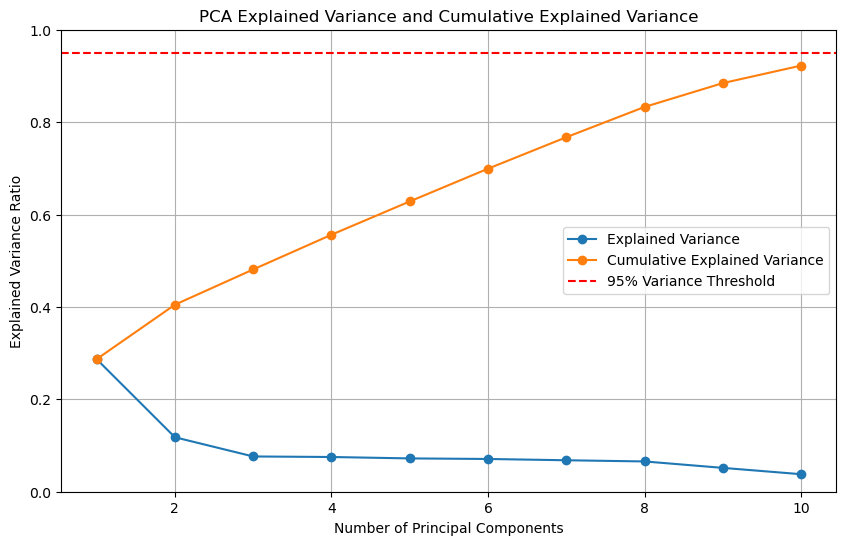

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Explained Variance')
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.title('PCA Explained Variance and Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

By applying the PCA, the dimensionality of the numerical data has been reduced from 23 original features down to 16 principal components. 

#### 7.4. Encoding categorical variables

In [48]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_categorical = encoder.fit_transform(data_for_clustering[categorical_features])

encoded_categorical_df = pd.DataFrame(encoded_categorical, 
                                      columns=encoder.get_feature_names_out(categorical_features),
                                      index=data_for_clustering.index)

#### 7.4. Encoding categorical variables

In [49]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_categorical = encoder.fit_transform(data_for_clustering[categorical_features])

encoded_categorical_df = pd.DataFrame(encoded_categorical, 
                                      columns=encoder.get_feature_names_out(categorical_features))

### 8. K-Means Clustering with PCA

In [50]:
#data_for_clustering_pca = pd.concat([principal_df, encoded_categorical_df], axis=1)

data_for_clustering_pca = pd.concat([principal_df, encoded_categorical_df, ordinal_df], axis=1)

data_for_clustering_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.243127  1.805911  0.310523 -0.385125 -2.017644 -0.985129  1.332584   
1  0.854579 -0.381203  0.525418  1.609193  1.593286  0.482030 -1.043580   
2 -2.199023  1.413783  0.058248 -2.597685 -0.602447  0.023239 -0.244905   
3 -0.571040 -0.682526 -0.953403 -0.112556 -0.014426  0.415376  2.255445   
4 -1.568219  0.965767 -1.643331  0.537230  0.070340 -0.940880  0.332724   

        PC8       PC9      PC10  ...  OverTime_Yes  Education  \
0 -1.592316  1.186751 -0.872418  ...           1.0          2   
1 -1.440104 -0.291620 -0.913626  ...           0.0          1   
2 -0.164601  0.703957  0.233508  ...           1.0          2   
3 -0.378977 -0.023222  0.448527  ...           1.0          4   
4  0.211081  2.314073 -0.009286  ...           0.0          1   

   EnvironmentSatisfaction  JobInvolvement  JobLevel  JobSatisfaction  \
0                        2               3         2                4   
1                        3               2         2                2   
2                        4               2         1                3   
3                        4               3         1                3   
4                        1               3         1                2   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   WorkLifeBalance  
0                1  
1                3  
2                3  
3                3  
4                3  

[5 rows x 40 columns]

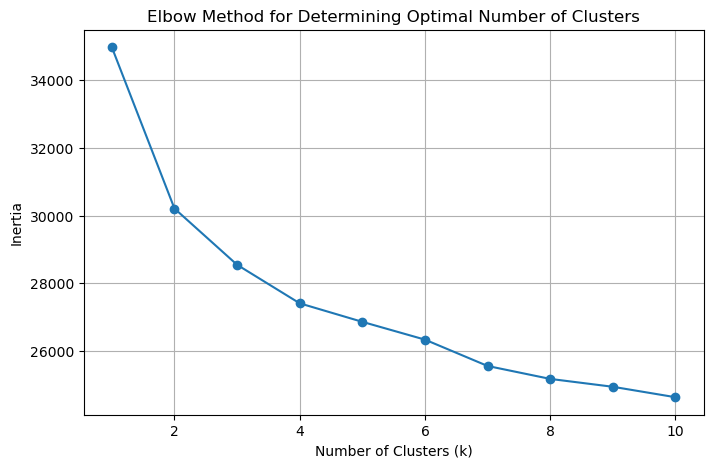

In [51]:
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.grid(True)
plt.show()

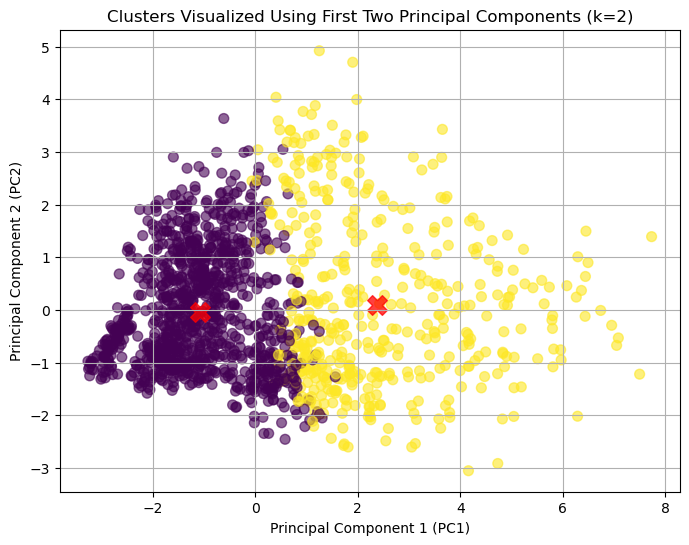

Silhouette Score for 2 clusters: 0.1497


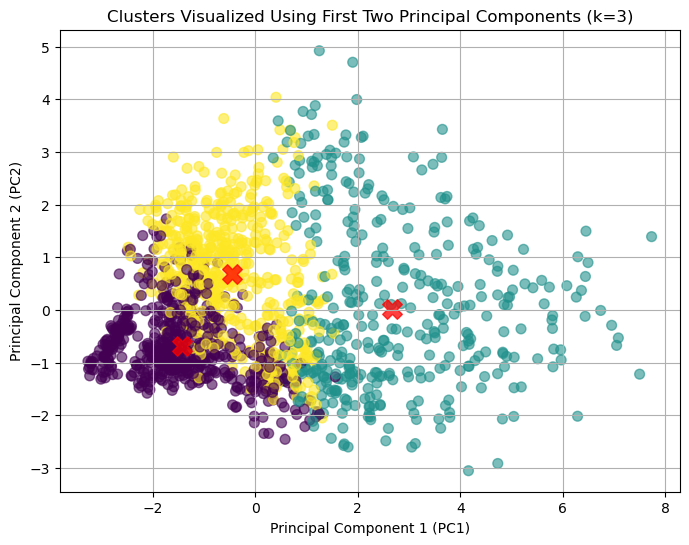

Silhouette Score for 3 clusters: 0.0607


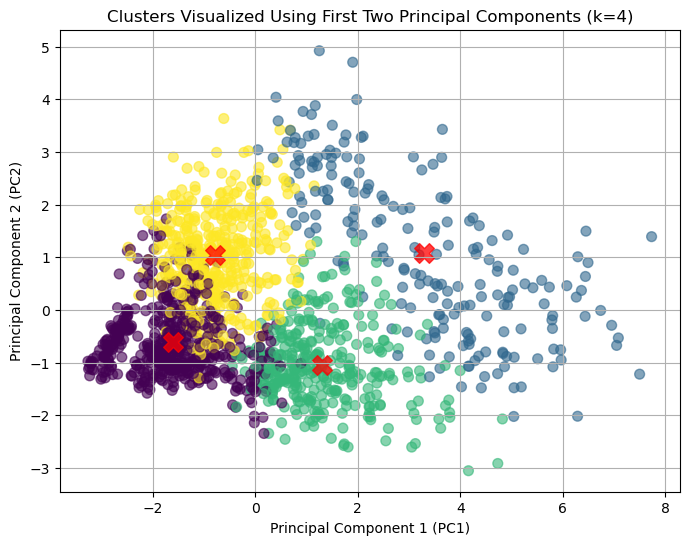

Silhouette Score for 4 clusters: 0.0921


In [52]:
results = []


for n_clusters in [2, 3, 4]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_for_clustering_pca)
    
    # Add the cluster labels to the PCA-transformed DataFrame
    data_for_clustering_pca[f'Cluster_{n_clusters}'] = cluster_labels
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(data_for_clustering_pca.drop(columns=[f'Cluster_{n_clusters}']), cluster_labels)
    results.append((n_clusters, silhouette_avg))
    
    # Visualize the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(data_for_clustering_pca['PC1'], data_for_clustering_pca['PC2'], c=cluster_labels, cmap='viridis', s=50, alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
    plt.title(f'Clusters Visualized Using First Two Principal Components (k={n_clusters})')
    plt.xlabel('Principal Component 1 (PC1)')
    plt.ylabel('Principal Component 2 (PC2)')
    plt.grid(True)
    plt.savefig(f'cluster_visualization_pca (k={n_clusters}).png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f'Silhouette Score for {n_clusters} clusters: {silhouette_avg:.4f}')

In [53]:
data_for_clustering_pca['Attrition'] = attrition.values

# Confirm that Attrition is now part of the dataset
data_for_clustering_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.243127  1.805911  0.310523 -0.385125 -2.017644 -0.985129  1.332584   
1  0.854579 -0.381203  0.525418  1.609193  1.593286  0.482030 -1.043580   
2 -2.199023  1.413783  0.058248 -2.597685 -0.602447  0.023239 -0.244905   
3 -0.571040 -0.682526 -0.953403 -0.112556 -0.014426  0.415376  2.255445   
4 -1.568219  0.965767 -1.643331  0.537230  0.070340 -0.940880  0.332724   

        PC8       PC9      PC10  ...  JobLevel  JobSatisfaction  \
0 -1.592316  1.186751 -0.872418  ...         2                4   
1 -1.440104 -0.291620 -0.913626  ...         2                2   
2 -0.164601  0.703957  0.233508  ...         1                3   
3 -0.378977 -0.023222  0.448527  ...         1                3   
4  0.211081  2.314073 -0.009286  ...         1                2   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   WorkLifeBalance  Cluster_2  Cluster_3  Cluster_4  Attrition  
0                1          0          2          3        Yes  
1                3          0          2          2         No  
2                3          0          0          0        Yes  
3                3          0          0          0         No  
4                3          0          0          0         No  

[5 rows x 44 columns]

### 9. K-Means clustering without PCA

As I am not getting a good result for the Silhouette Score using PCA, I would try and manually reduce the dimensionality of the dataframe based on the correlation matrix where very strong correlations were observed.

In [54]:
employee_df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

In [55]:
correlation_matrix = employee_df.corr()

# Filter the matrix to show only strong correlations (>|0.70| or <-0.70)
strong_correlations = correlation_matrix[(correlation_matrix > 0.70) | (correlation_matrix < -0.70)]

# Remove the diagonal (self-correlations) for clarity
strong_correlations = strong_correlations.where(~np.eye(strong_correlations.shape[0], dtype=bool))

# Display the strong correlations
strong_correlations.dropna(how='all', axis=0).dropna(how='all', axis=1)

JobLevel  MonthlyIncome  PercentSalaryHike  \
JobLevel                   NaN       0.950300                NaN   
MonthlyIncome         0.950300            NaN                NaN   
PercentSalaryHike          NaN            NaN                NaN   
PerformanceRating          NaN            NaN            0.77355   
TotalWorkingYears     0.782208       0.772893                NaN   
YearsAtCompany             NaN            NaN                NaN   
YearsInCurrentRole         NaN            NaN                NaN   
YearsWithCurrManager       NaN            NaN                NaN   

                      PerformanceRating  TotalWorkingYears  YearsAtCompany  \
JobLevel                            NaN           0.782208             NaN   
MonthlyIncome                       NaN           0.772893             NaN   
PercentSalaryHike               0.77355                NaN             NaN   
PerformanceRating                   NaN                NaN             NaN   
TotalWorkingYears                   NaN                NaN             NaN   
YearsAtCompany                      NaN                NaN             NaN   
YearsInCurrentRole                  NaN                NaN        0.758754   
YearsWithCurrManager                NaN                NaN        0.769212   

                      YearsInCurrentRole  YearsWithCurrManager  
JobLevel                             NaN                   NaN  
MonthlyIncome                        NaN                   NaN  
PercentSalaryHike                    NaN                   NaN  
PerformanceRating                    NaN                   NaN  
TotalWorkingYears                    NaN                   NaN  
YearsAtCompany                  0.758754              0.769212  
YearsInCurrentRole                   NaN              0.714365  
YearsWithCurrManager            0.714365                   NaN

I will proceed and remove the JobLevel and leave only the MonthlyIncome as they have nearly perfect correlation.  YearsInCurrentRole, YearsAtCompany and YearWithCurrManager are redundant and will be merged into a new column on an average basis named 'MeanYears'

In [56]:
# Copy the original DataFrame
employee_df_no_pca = employee_df.copy()

# Calculate the mean for the specified columns
employee_df_no_pca['YearsMean'] = employee_df_no_pca[['YearsInCurrentRole', 'YearsAtCompany', 'YearsWithCurrManager']].mean(axis=1)

# Drop the original columns
employee_df_no_pca = employee_df_no_pca.drop(columns=['YearsInCurrentRole', 'YearsAtCompany', 'YearsWithCurrManager'])

employee_df['YearsMean'] = employee_df[['YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].mean(axis=1)

employee_df = employee_df.drop(columns=['YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'])

In [57]:
employee_df_no_pca = employee_df_no_pca.drop(columns=['JobLevel'])

In [58]:
employee_df_no_pca.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  OverTime  PercentSalaryHike PerformanceRating  \
0  Female  ...       Yes                 11                 3   
1    Male  ...        No                 23                 4   
2    Male  ...       Yes                 15                 3   
3  Female  ...       Yes                 11                 3   
4    Male  ...        No                 12                 3   

   RelationshipSatisfaction StockOptionLevel  TotalWorkingYears  \
0                         1                0                  8   
1                         4                1                 10   
2                         2                0                  7   
3                         3                0                  8   
4                         4                1                  6   

   TrainingTimesLastYear  WorkLifeBalance YearsSinceLastPromotion  YearsMean  
0                      0                1                       0        5.0  
1                      3                3                       1        8.0  
2                      3                3                       0        0.0  
3                      3                3                       3        5.0  
4                      3                3                       2        2.0  

[5 rows x 28 columns]

In [59]:
attrition = employee_df_no_pca['Attrition']

data_for_clustering_no_pca = employee_df_no_pca.drop(columns=['Attrition'])
data_for_clustering_no_pca.head()

Age     BusinessTravel  DailyRate              Department  \
0   41      Travel_Rarely       1102                   Sales   
1   49  Travel_Frequently        279  Research & Development   
2   37      Travel_Rarely       1373  Research & Development   
3   33  Travel_Frequently       1392  Research & Development   
4   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  ...  OverTime PercentSalaryHike  PerformanceRating  \
0  Female          94  ...       Yes                11                  3   
1    Male          61  ...        No                23                  4   
2    Male          92  ...       Yes                15                  3   
3  Female          56  ...       Yes                11                  3   
4    Male          40  ...        No                12                  3   

  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                        1                 0                  8   
1                        4                 1                 10   
2                        2                 0                  7   
3                        3                 0                  8   
4                        4                 1                  6   

   TrainingTimesLastYear WorkLifeBalance  YearsSinceLastPromotion  YearsMean  
0                      0               1                        0        5.0  
1                      3               3                        1        8.0  
2                      3               3                        0        0.0  
3                      3               3                        3        5.0  
4                      3               3                        2        2.0  

[5 rows x 27 columns]

In [60]:
numerical_features_no_pca = data_for_clustering_no_pca.select_dtypes(include=['int64', 'float64']).columns
categorical_features_no_pca = data_for_clustering_no_pca.select_dtypes(include=['object', 'category']).columns

print("Numerical Features:", numerical_features_no_pca)
print("Categorical Features:", categorical_features_no_pca)

Numerical Features: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsSinceLastPromotion', 'YearsMean'],
      dtype='object')
Categorical Features: Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')


In [61]:
ordinal_features = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 
                    'JobSatisfaction', 'PerformanceRating', 
                    'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

continuous_numerical_features_no_pca = numerical_features_no_pca.difference(ordinal_features)

print("Continuous Numerical Features:", continuous_numerical_features_no_pca)

Continuous Numerical Features: Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsMean',
       'YearsSinceLastPromotion'],
      dtype='object')


In [62]:
ordinal_df_no_pca = data_for_clustering_no_pca[ordinal_features]

In [63]:
scaler = StandardScaler()
data_for_clustering_no_pca[continuous_numerical_features_no_pca] = scaler.fit_transform(data_for_clustering_no_pca[continuous_numerical_features_no_pca])

In [64]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Apply OneHotEncoder to the categorical features
encoded_categorical_no_pca = encoder.fit_transform(data_for_clustering_no_pca[categorical_features_no_pca])

# Convert the encoded data back into a DataFrame with appropriate column names
encoded_categorical_df_no_pca = pd.DataFrame(encoded_categorical_no_pca, 
                                      columns=encoder.get_feature_names_out(categorical_features_no_pca))

In [65]:
combined_df = pd.concat([data_for_clustering_no_pca[continuous_numerical_features_no_pca], ordinal_df_no_pca], axis=1)

final_df = pd.concat([combined_df, encoded_categorical_df_no_pca], axis=1)

final_df.head()

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
0  0.446350   0.742527         -1.010909    1.383138      -0.108350   
1  1.322365  -1.297775         -0.147150   -0.240677      -0.291719   
2  0.008343   1.414363         -0.887515    1.284725      -0.937654   
3 -0.429664   1.461466         -0.764121   -0.486709      -0.763634   
4 -1.086676  -0.524295         -0.887515   -1.274014      -0.644858   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0     0.726020            2.125136          -1.150554          -0.421642   
1     1.488876           -0.678049           2.129306          -0.164511   
2    -1.674841            1.324226          -0.057267          -0.550208   
3     1.243211           -0.678049          -1.150554          -0.421642   
4     0.325900            2.525591          -0.877232          -0.678774   

   TrainingTimesLastYear  ...  JobRole_Laboratory Technician  JobRole_Manager  \
0              -2.171982  ...                            0.0              0.0   
1               0.155707  ...                            0.0              0.0   
2               0.155707  ...                            1.0              0.0   
3               0.155707  ...                            0.0              0.0   
4               0.155707  ...                            1.0              0.0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                         0.0                      1.0   
1                         1.0                      0.0   
2                         0.0                      0.0   
3                         1.0                      0.0   
4                         0.0                      0.0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                           0.0                    0.0                   1.0   
1                           0.0                    1.0                   0.0   
2                           0.0                    0.0                   1.0   
3                           0.0                    1.0                   0.0   
4                           0.0                    1.0                   0.0   

   OverTime_Yes  
0           1.0  
1           0.0  
2           1.0  
3           1.0  
4           0.0  

[5 rows x 41 columns]

In [66]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   DailyRate                          1470 non-null   float64
 2   DistanceFromHome                   1470 non-null   float64
 3   HourlyRate                         1470 non-null   float64
 4   MonthlyIncome                      1470 non-null   float64
 5   MonthlyRate                        1470 non-null   float64
 6   NumCompaniesWorked                 1470 non-null   float64
 7   PercentSalaryHike                  1470 non-null   float64
 8   TotalWorkingYears                  1470 non-null   float64
 9   TrainingTimesLastYear              1470 non-null   float64
 10  YearsMean                          1470 non-null   float64
 11  YearsSinceLastPromotion            1470 non-null   float

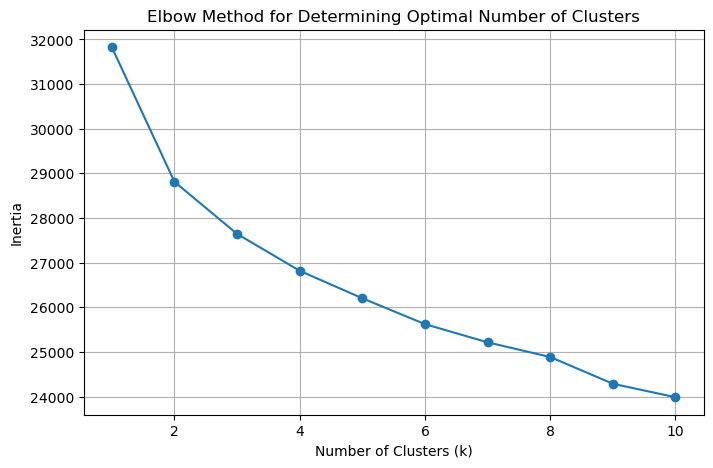

In [67]:
# Calculate inertia for a range of cluster numbers
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.grid(True)
plt.show()

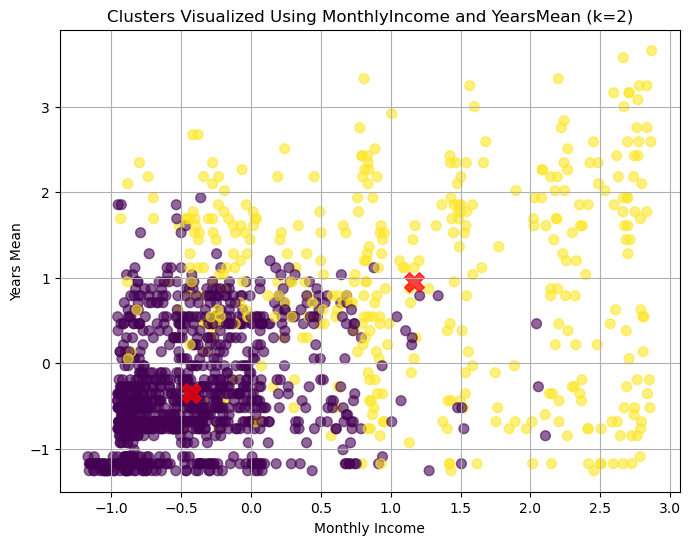

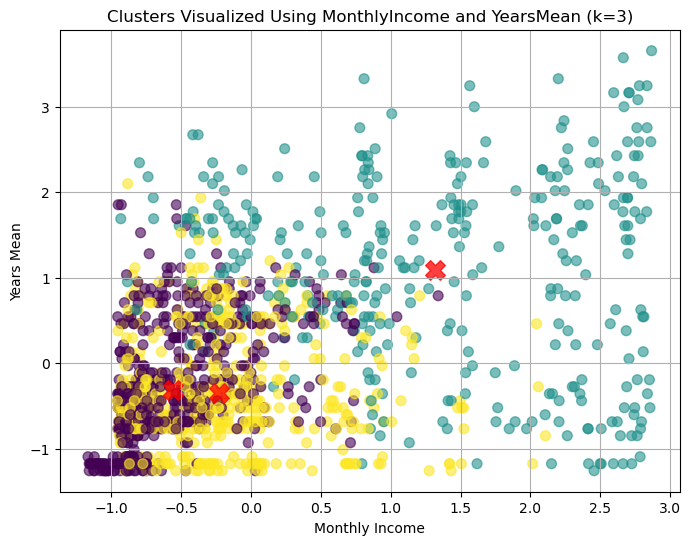

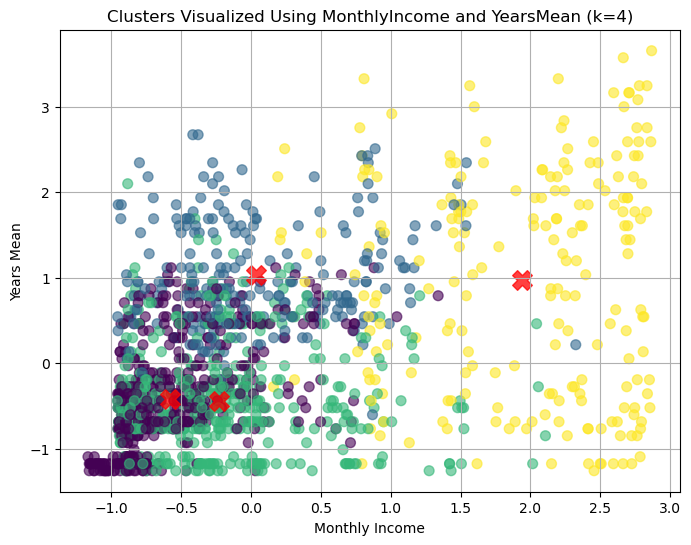

Silhouette Scores for different cluster numbers (without PCA):
Clusters: 2, Silhouette Score: 0.1197
Clusters: 3, Silhouette Score: 0.0540
Clusters: 4, Silhouette Score: 0.0827


In [68]:
results_no_pca = []

# Perform K-means clustering for different n_clusters values
for n_clusters in [2, 3, 4]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(final_df)
    
    # Add the cluster labels to the DataFrame
    final_df[f'Cluster_{n_clusters}'] = cluster_labels
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(final_df.drop(columns=[f'Cluster_{n_clusters}']), cluster_labels)
    results_no_pca.append((n_clusters, silhouette_avg))
    
    # Visualize the clusters using 'MonthlyIncome' and 'YearsMean'
    plt.figure(figsize=(8, 6))
    plt.scatter(final_df['MonthlyIncome'], final_df['YearsMean'], c=cluster_labels, cmap='viridis', s=50, alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, final_df.columns.get_loc('MonthlyIncome')], 
                kmeans.cluster_centers_[:, final_df.columns.get_loc('YearsMean')], 
                c='red', s=200, alpha=0.75, marker='X')
    plt.title(f'Clusters Visualized Using MonthlyIncome and YearsMean (k={n_clusters})')
    plt.xlabel('Monthly Income')
    plt.ylabel('Years Mean')
    plt.grid(True)
    plt.savefig(f'cluster_visualization (k={n_clusters}).png', dpi=300, bbox_inches='tight')
    plt.show()

# Display the results
print("Silhouette Scores for different cluster numbers (without PCA):")
for n_clusters, score in results_no_pca:
    print(f"Clusters: {n_clusters}, Silhouette Score: {score:.4f}")

### 9. K-Means clustering without PCA and not scaling the data

Based on the analysis done until now, I will select features that are highly relevant to understandning employee behavior, particularly attrition: 

MonthlyIncome: This feature is crucial because high earners have been identified as less likely to leave. Therefore, it could strongly influence cluster formation.

YearsAtCompany: Since long-tenured employees are less likely to leave, this is an important feature that differentiates employees based on their tenure.

NumCompaniesWorked: This reflects career mobility, which can help identify employees who are more or less stable in their careers.

YearsSinceLastPromotion: As the analysis shows, this feature relates to attrition, with employees who haven’t had a recent promotion being less likely to leave.

I didn’t scale the features because their raw values are meaningful in this context. For example, differences in MonthlyIncome (e.g., $3,000 vs. $16,000) carry significant real-world meaning. Scaling would have made these differences less impactful, which could obscure important distinctions between employee groups.


Based on the previous analysis, high earners have a distinct attrition pattern. By not scaling, I preserve their influence on cluster formation. Scaling would treat these differences as less significant, potentially masking the high earners' impact on clustering.

In [69]:
employee_df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

In [70]:
# Copy the original DataFrame
employee_df_no_pca_no_scaling = employee_df.copy()

In [71]:
# Copy the original DataFrame
employee_df_no_pca = employee_df.copy()

# Calculate the mean for the specified columns
employee_df_no_pca_no_scaling['YearsMean'] = employee_df_no_pca_no_scaling[['YearsInCurrentRole', 'YearsAtCompany', 'YearsWithCurrManager']].mean(axis=1)

# Drop the original columns
employee_df_no_pca_no_scaling = employee_df_no_pca_no_scaling.drop(columns=['YearsInCurrentRole', 'YearsAtCompany', 'YearsWithCurrManager'])

In [72]:
employee_df_no_pca_no_scaling = employee_df_no_pca_no_scaling.drop('JobLevel', axis=1)

In [73]:
employee_df_no_pca_no_scaling.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  OverTime  PercentSalaryHike PerformanceRating  \
0  Female  ...       Yes                 11                 3   
1    Male  ...        No                 23                 4   
2    Male  ...       Yes                 15                 3   
3  Female  ...       Yes                 11                 3   
4    Male  ...        No                 12                 3   

   RelationshipSatisfaction StockOptionLevel  TotalWorkingYears  \
0                         1                0                  8   
1                         4                1                 10   
2                         2                0                  7   
3                         3                0                  8   
4                         4                1                  6   

   TrainingTimesLastYear  WorkLifeBalance YearsSinceLastPromotion  YearsMean  
0                      0                1                       0        5.0  
1                      3                3                       1        8.0  
2                      3                3                       0        0.0  
3                      3                3                       3        5.0  
4                      3                3                       2        2.0  

[5 rows x 28 columns]

In [74]:
selected_features = ['Age', 'DistanceFromHome', 'MonthlyIncome', 
                     'YearsMean', 'JobSatisfaction', 'YearsSinceLastPromotion']

X = employee_df_no_pca_no_scaling[selected_features]  
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

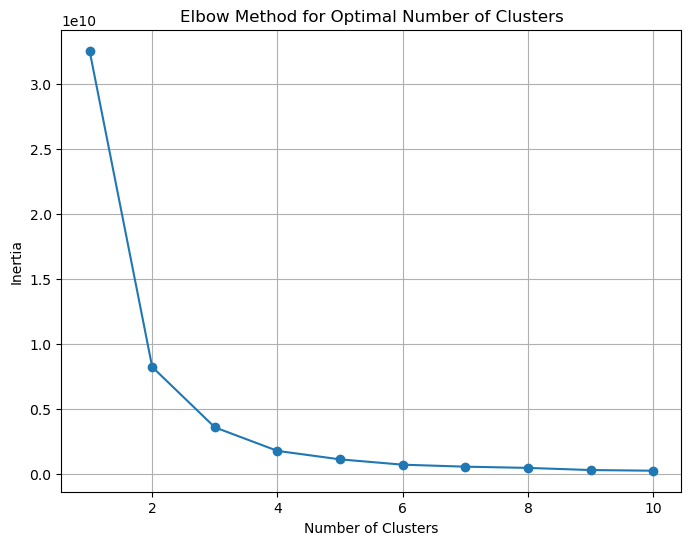

In [75]:
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.savefig('elbow.png', dpi=300, bbox_inches='tight')
plt.show()

In [76]:
# Clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
employee_df_no_pca_no_scaling['Cluster_3'] = kmeans_3.fit_predict(X)
silhouette_3 = silhouette_score(X, employee_df_no_pca_no_scaling['Cluster_3'])
attrition_crosstab_3 = pd.crosstab(employee_df_no_pca_no_scaling['Cluster_3'], employee_df_no_pca_no_scaling['Attrition'])

# Clustering with 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
employee_df_no_pca_no_scaling['Cluster_2'] = kmeans_2.fit_predict(X)
silhouette_2 = silhouette_score(X, employee_df_no_pca_no_scaling['Cluster_2'])
attrition_crosstab_2 = pd.crosstab(employee_df_no_pca_no_scaling['Cluster_2'], employee_df_no_pca_no_scaling['Attrition'])

# Display the results
silhouette_2, attrition_crosstab_2, silhouette_3, attrition_crosstab_3

(0.7079536128786411,
 Attrition   No  Yes
 Cluster_2          
 0          936  204
 1          297   33,
 0.6234255620950444,
 Attrition   No  Yes
 Cluster_3          
 0          737  179
 1          179   10
 2          317   48)

In [77]:
employee_df_no_pca_no_scaling.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction StockOptionLevel  \
0  Female  ...                  3                         1                0   
1    Male  ...                  4                         4                1   
2    Male  ...                  3                         2                0   
3  Female  ...                  3                         3                0   
4    Male  ...                  3                         4                1   

   TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                  8                     0                1   
1                 10                     3                3   
2                  7                     3                3   
3                  8                     3                3   
4                  6                     3                3   

   YearsSinceLastPromotion  YearsMean Cluster_3  Cluster_2  
0                        0        5.0         0          0  
1                        1        8.0         0          0  
2                        0        0.0         0          0  
3                        3        5.0         0          0  
4                        2        2.0         0          0  

[5 rows x 30 columns]

https://stats.stackexchange.com/questions/89809/is-it-important-to-scale-data-before-clustering

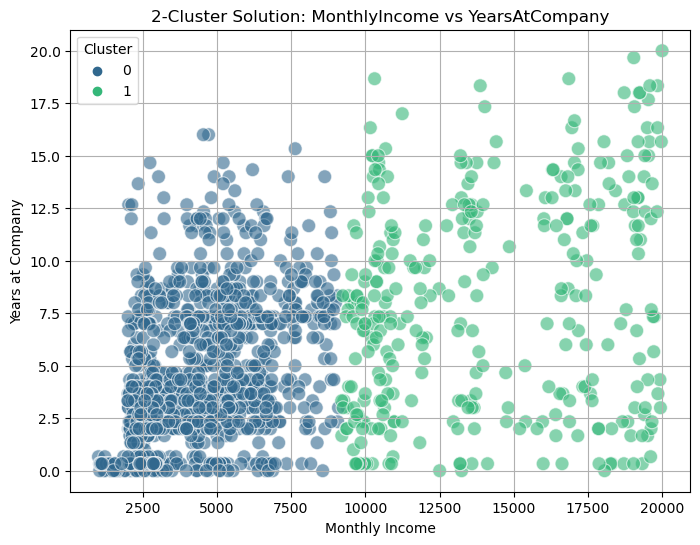

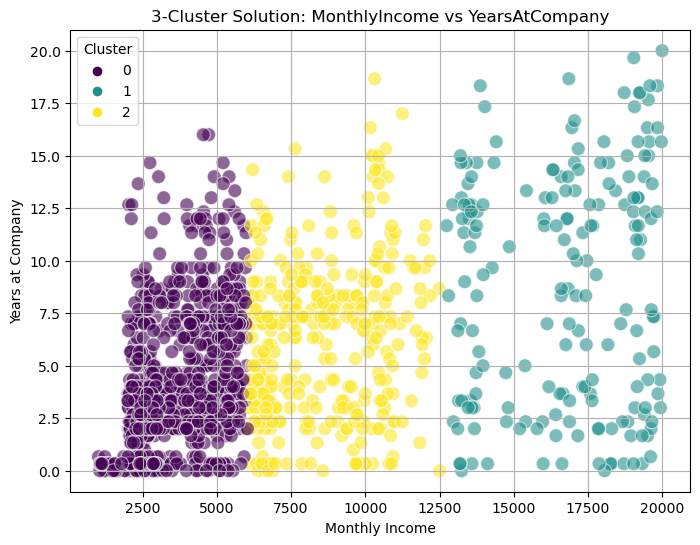

In [78]:
# Visualize the clusters for the 2-cluster solution
plt.figure(figsize=(8, 6))
sns.scatterplot(x=employee_df_no_pca_no_scaling['MonthlyIncome'], y=employee_df_no_pca_https://stats.stackexchange.com/questions/89809/is-it-important-to-scale-data-before-clusteringno_scaling['YearsMean'], hue=employee_df_no_pca_no_scaling['Cluster_2'], palette='viridis', s=100, alpha=0.6)
plt.title('2-Cluster Solution: MonthlyIncome vs YearsAtCompany')
plt.xlabel('Monthly Income')
plt.ylabel('Years at Company')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig('cluster_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualize the clusters for the 3-cluster solution
plt.figure(figsize=(8, 6))
sns.scatterplot(x=employee_df_no_pca_no_scaling['MonthlyIncome'], y=employee_df_no_pca_no_scaling['YearsMean'], hue=employee_df_no_pca_no_scaling['Cluster_3'], palette='viridis', s=100, alpha=0.6)
plt.title('3-Cluster Solution: MonthlyIncome vs YearsAtCompany')
plt.xlabel('Monthly Income')
plt.ylabel('Years at Company')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


The 2-cluster solution shows strong separation and aligns well with attrition patterns, with a clear distinction between more stable, high-earning employees and others.  
The 3-cluster solution offers a more nuanced breakdown but might introduce some redundancy with overlapping groups.

In [79]:
employee_df_no_pca_no_scaling.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction StockOptionLevel  \
0  Female  ...                  3                         1                0   
1    Male  ...                  4                         4                1   
2    Male  ...                  3                         2                0   
3  Female  ...                  3                         3                0   
4    Male  ...                  3                         4                1   

   TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                  8                     0                1   
1                 10                     3                3   
2                  7                     3                3   
3                  8                     3                3   
4                  6                     3                3   

   YearsSinceLastPromotion  YearsMean Cluster_3  Cluster_2  
0                        0        5.0         0          0  
1                        1        8.0         0          0  
2                        0        0.0         0          0  
3                        3        5.0         0          0  
4                        2        2.0         0          0  

[5 rows x 30 columns]

In [80]:
attrition_rate_2_clusters = employee_df_no_pca_no_scaling.groupby('Cluster_2')['Attrition'].value_counts(normalize=True).unstack()
attrition_rate_3_clusters = employee_df_no_pca_no_scaling.groupby('Cluster_3')['Attrition'].value_counts(normalize=True).unstack()

# Display attrition rates for 2 and 3 clusters
attrition_rate_2_clusters, attrition_rate_3_clusters

(Attrition        No       Yes
 Cluster_2                    
 0          0.821053  0.178947
 1          0.900000  0.100000,
 Attrition        No       Yes
 Cluster_3                    
 0          0.804585  0.195415
 1          0.947090  0.052910
 2          0.868493  0.131507)

2-Cluster Solution:  
Cluster 0:  
90% of employees stayed.  
10% of employees left.  
Cluster 1:  
82% of employees stayed.  
18% of employees left.  
3-Cluster Solution:  
Cluster 0:  
95% of employees stayed.  
5% of employees left (this is the most stable cluster).  
Cluster 1:  
80% of employees stayed.  
20% of employees left (this cluster has the highest attrition rate).  
Cluster 2:  
87% of employees stayed.  
13% of employees left.  

2-Cluster Solution:  
Cluster 1 (lower earners, shorter tenure) has a higher attrition rate (18.9%), while Cluster 0 (higher earners, longer tenure) is more stable with only 10% leaving.  
3-Cluster Solution:  
Cluster 1 (low earners, short tenure) has the highest attrition rate (19.5%), indicating that employees in this group are more likely to leave.  
Cluster 0 (high earners, long tenure) is the most stable, with only 5% of employees leaving.  
Cluster 2 (mid-level earners, moderate tenure) also has some attrition, but at a lower rate (13%).

Employees in Cluster 1 (both in the 2- and 3-cluster solutions) have the highest attrition rates, characterized by lower income, shorter tenure, and more recent promotions.
Cluster 0 consistently represents high earners with long tenure, who are the most stable and least likely to leave.

To further investigate whether recent promotions have a direct impact on attrition,I will specifically analyze the YearsSinceLastPromotion feature and its relationship to Attrition. This will help verify if employees with recent promotions are more likely to leave or if there’s another factor driving the higher attrition rate in Cluster 1. This was an interesting insight also shared by one of the intervieewes.

In [81]:
promotion_attrition_analysis = employee_df_no_pca_no_scaling.groupby('Attrition')['YearsSinceLastPromotion'].mean()

promotion_attrition_analysis


Attrition
No     2.234388
Yes    1.945148
Name: YearsSinceLastPromotion, dtype: float64

On average, employees who left had more recent promotions compared to those who stayed.  
This suggests that employees with more recent promotions are slightly more likely to leave, but the difference is small. It may indicate that while promotions are important, other factors like income and tenure might play a stronger role in driving attrition.

In [82]:
attrition_summary = employee_df_no_pca_no_scaling.groupby('Attrition')[selected_features].mean()

print(attrition_summary) 

                 Age  DistanceFromHome  MonthlyIncome  YearsMean  \
Attrition                                                          
No         37.561233          8.915653    6832.739659   5.406867   
Yes        33.607595         10.632911    4787.092827   3.628692   

           JobSatisfaction  YearsSinceLastPromotion  
Attrition                                            
No                2.778589                 2.234388  
Yes               2.468354                 1.945148  


In [83]:
employee_df_no_pca_no_scaling.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction StockOptionLevel  \
0  Female  ...                  3                         1                0   
1    Male  ...                  4                         4                1   
2    Male  ...                  3                         2                0   
3  Female  ...                  3                         3                0   
4    Male  ...                  3                         4                1   

   TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                  8                     0                1   
1                 10                     3                3   
2                  7                     3                3   
3                  8                     3                3   
4                  6                     3                3   

   YearsSinceLastPromotion  YearsMean Cluster_3  Cluster_2  
0                        0        5.0         0          0  
1                        1        8.0         0          0  
2                        0        0.0         0          0  
3                        3        5.0         0          0  
4                        2        2.0         0          0  

[5 rows x 30 columns]

In [84]:
employee_df_no_pca_no_scaling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   object 
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobRole                   1470 non-null   object 
 13  JobSatisfaction           1470 non-null   int64  
 14  MaritalS

## 10. Supervised learning - Employee Attrition Prediction

As k-means was performing better without scaling and encoding the data and the two dataframes that will be used are based on it, I would need to encode and scale the data. 

In [85]:
employee_df_no_pca_no_scaling['Attrition'] = employee_df_no_pca_no_scaling['Attrition'].map({'Yes': 1, 'No': 0})

In [86]:
employee_df_no_pca_no_scaling.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction StockOptionLevel  \
0  Female  ...                  3                         1                0   
1    Male  ...                  4                         4                1   
2    Male  ...                  3                         2                0   
3  Female  ...                  3                         3                0   
4    Male  ...                  3                         4                1   

   TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                  8                     0                1   
1                 10                     3                3   
2                  7                     3                3   
3                  8                     3                3   
4                  6                     3                3   

   YearsSinceLastPromotion  YearsMean Cluster_3  Cluster_2  
0                        0        5.0         0          0  
1                        1        8.0         0          0  
2                        0        0.0         0          0  
3                        3        5.0         0          0  
4                        2        2.0         0          0  

[5 rows x 30 columns]

In [87]:
employee_df_no_pca_no_scaling = employee_df_no_pca_no_scaling.drop('Cluster_3', axis=1)

In [88]:
# Define X (independent variables) and y (dependent variable)
X = employee_df_no_pca_no_scaling.drop('Attrition', axis=1) 
y = employee_df_no_pca_no_scaling['Attrition']               

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
print("Training test size:", X_train.shape)
print("Testing test size:", X_test.shape)

Training test size: (1029, 28)
Testing test size: (441, 28)


In [91]:
categorical_columns = X_train.select_dtypes(include=['object']).columns

In [92]:
encoder = OneHotEncoder()

encoded_train_data = encoder.fit_transform(X_train[categorical_columns]).toarray()

encoded_train_df = pd.DataFrame(encoded_train_data, columns=encoder.get_feature_names_out(categorical_columns))

X_train_without_categorical = X_train.drop(categorical_columns, axis=1)

X_train_final = pd.concat([X_train_without_categorical.reset_index(drop=True), 
                           encoded_train_df.reset_index(drop=True)], axis=1)

X_train_final.head()


Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   50       1126                 1          2                        4   
1   36        216                 6          2                        2   
2   21        337                 7          1                        2   
3   50       1246                 3          3                        1   
4   52        994                 7          4                        2   

   HourlyRate  JobInvolvement  JobSatisfaction  MonthlyIncome  MonthlyRate  \
0          66               3                4          17399         6615   
1          84               3                2           4941         2819   
2          31               3                2           2679         4567   
3          99               3                2          18200         7999   
4          87               3                2          10445        15322   

   ...  JobRole_Manufacturing Director  JobRole_Research Director  \
0  ...                             0.0                        1.0   
1  ...                             1.0                        0.0   
2  ...                             0.0                        0.0   
3  ...                             0.0                        0.0   
4  ...                             0.0                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         0.0                      0.0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                           0.0                     1.0   
1                           0.0                     1.0   
2                           1.0                     0.0   
3                           0.0                     0.0   
4                           0.0                     0.0   

   MaritalStatus_Married  MaritalStatus_Single  OverTime_No  OverTime_Yes  
0                    0.0                   0.0          1.0           0.0  
1                    0.0                   0.0          1.0           0.0  
2                    0.0                   1.0          1.0           0.0  
3                    1.0                   0.0          1.0           0.0  
4                    0.0                   1.0          1.0           0.0  

[5 rows x 49 columns]

In [93]:
encoded_test_data = encoder.transform(X_test[categorical_columns]).toarray()

encoded_test_df = pd.DataFrame(encoded_test_data, columns=encoder.get_feature_names_out(categorical_columns))

X_test_without_categorical = X_test.drop(categorical_columns, axis=1)

X_test_final = pd.concat([X_test_without_categorical.reset_index(drop=True), 
                          encoded_test_df.reset_index(drop=True)], axis=1)

X_test_final.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   28        866                 5          3                        4   
1   53       1084                13          2                        4   
2   24        240                22          1                        4   
3   45       1339                 7          3                        2   
4   36       1396                 5          2                        4   

   HourlyRate  JobInvolvement  JobSatisfaction  MonthlyIncome  MonthlyRate  \
0          84               3                1           8463        23490   
1          57               4                1           4450        26250   
2          58               1                3           1555        11585   
3          59               3                1           9724        18787   
4          62               3                2           5914         9945   

   ...  JobRole_Manufacturing Director  JobRole_Research Director  \
0  ...                             0.0                        0.0   
1  ...                             1.0                        0.0   
2  ...                             0.0                        0.0   
3  ...                             0.0                        0.0   
4  ...                             0.0                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                         0.0                      1.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         1.0                      0.0   
4                         0.0                      0.0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                           0.0                     0.0   
1                           0.0                     1.0   
2                           0.0                     0.0   
3                           0.0                     1.0   
4                           0.0                     0.0   

   MaritalStatus_Married  MaritalStatus_Single  OverTime_No  OverTime_Yes  
0                    0.0                   1.0          1.0           0.0  
1                    0.0                   0.0          1.0           0.0  
2                    1.0                   0.0          1.0           0.0  
3                    0.0                   0.0          1.0           0.0  
4                    0.0                   1.0          1.0           0.0  

[5 rows x 49 columns]

In [94]:
print(X_train_final.shape, X_test_final.shape)

(1029, 49) (441, 49)


In [95]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train)

# Check the new class distribution
print("Original class distribution in y_train:", Counter(y_train))
print("Resampled class distribution in y_train_resampled:", Counter(y_train_resampled))

Original class distribution in y_train: Counter({0: 853, 1: 176})
Resampled class distribution in y_train_resampled: Counter({0: 853, 1: 853})


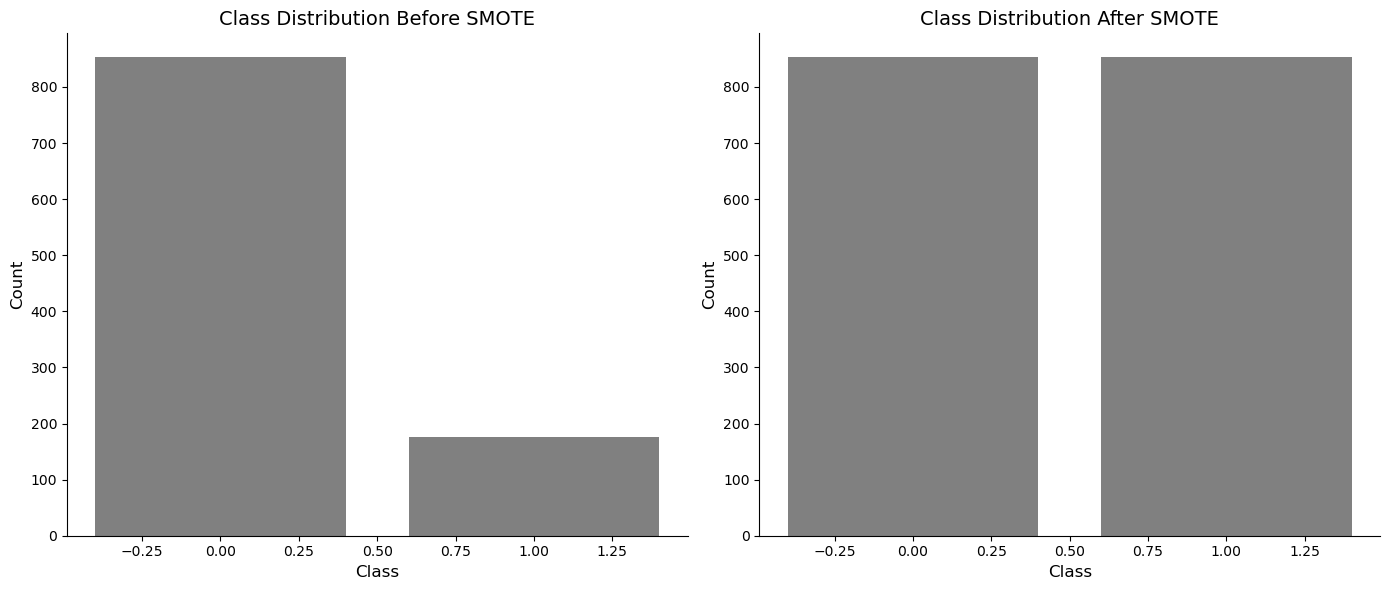

In [96]:
class_distribution_before = Counter(y_train)

class_distribution_after = Counter(y_train_resampled)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(class_distribution_before.keys(), class_distribution_before.values(), color='gray')
axes[0].set_title('Class Distribution Before SMOTE', fontsize=14)
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].spines['top'].set_visible(False)  
axes[0].spines['right'].set_visible(False)

axes[1].bar(class_distribution_after.keys(), class_distribution_after.values(), color='gray')
axes[1].set_title('Class Distribution After SMOTE', fontsize=14)
axes[1].set_xlabel('Class', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

for ax in axes:
    ax.grid(False)

plt.tight_layout()

plt.savefig('class_distribution_before_after_smote_tufte_style.png', dpi=300, bbox_inches='tight')

plt.show()


In [97]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to the resampled training data
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Apply scaling to the test data
X_test_scaled = scaler.transform(X_test_final)

In [98]:
# Define parameter grid for Random Forest
rf_param_grid = {
    "criterion":("gini", "entropy"),  
    "max_depth":list(range(2, 10)), 
    "min_samples_split":[2, 3, 4] , 
    "min_samples_leaf":list(range(1, 20)), 
}

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, 
                               cv=5, scoring='recall', verbose=2, n_jobs=-1)

# Fit GridSearchCV
rf_grid_search.fit(X_train_scaled, y_train_resampled)

# Fit GridSearchCV using the scaled NumPy arrays
#rf_grid_search.fit(X_train_scaled, y_train_resampled)

# Best parameters and score
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best score for Random Forest:", rf_grid_search.best_score_)

Fitting 5 folds for each of 912 candidates, totalling 4560 fits
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best score for Random Forest: 0.8455796353629171


In [99]:
print_score(rf_grid_search, X_train_scaled, y_train_resampled, X_test_scaled, y_test, train=True)
print_score(rf_grid_search, X_train_scaled, y_train_resampled, X_test_scaled, y_test, train=False)

Train Result:
Accuracy Score: 97.25%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.951794    0.995086   0.97245     0.973440      0.973440
recall       0.995311    0.949590   0.97245     0.972450      0.972450
f1-score     0.973066    0.971806   0.97245     0.972436      0.972436
support    853.000000  853.000000   0.97245  1706.000000   1706.000000
_______________________________________________
Confusion Matrix: 
 [[849   4]
 [ 43 810]]

Test Result:
Accuracy Score: 87.76%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.888095   0.666667  0.877551    0.777381      0.857467
recall       0.981579   0.229508  0.877551    0.605544      0.877551
f1-score     0.932500   0.341463  0.877551    0.636982      0.850747
support    380.000000  61.000000  0.877551  441.000000    441.

In [100]:
# Define parameter grid for AdaBoost
ada_param_grid = {
    'n_estimators': [50, 100, 200],       
    'learning_rate': [0.01, 0.1, 1]      
}

# Initialize AdaBoost Classifier
ada_model = AdaBoostClassifier(random_state=42)

# Initialize GridSearchCV for AdaBoost
ada_grid_search = GridSearchCV(estimator=ada_model, param_grid=ada_param_grid, 
                               cv=5, scoring='recall', verbose=2, n_jobs=-1)

# Fit GridSearchCV on the training data
ada_grid_search.fit(X_train_scaled, y_train_resampled)

# Best parameters and score for AdaBoost
print("Best parameters for AdaBoost:", ada_grid_search.best_params_)
print("Best score for AdaBoost:", ada_grid_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 50}
Best score for AdaBoost: 0.8360577915376677


In [101]:
print_score(ada_grid_search, X_train_scaled, y_train_resampled, X_test_scaled, y_test, train=True)
print_score(ada_grid_search, X_train_scaled, y_train_resampled, X_test_scaled, y_test, train=False)

Train Result:
Accuracy Score: 87.28%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.862187    0.884058  0.872802     0.873122      0.873122
recall       0.887456    0.858148  0.872802     0.872802      0.872802
f1-score     0.874639    0.870910  0.872802     0.872775      0.872775
support    853.000000  853.000000  0.872802  1706.000000   1706.000000
_______________________________________________
Confusion Matrix: 
 [[757  96]
 [121 732]]

Test Result:
Accuracy Score: 82.99%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.908847   0.397059  0.829932    0.652953      0.838056
recall       0.892105   0.442623  0.829932    0.667364      0.829932
f1-score     0.900398   0.418605  0.829932    0.659502      0.833756
support    380.000000  61.000000  0.829932  441.000000    441.

In [102]:
# Define parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, 
                               cv=5, scoring='recall', verbose=2, n_jobs=-1)

# Fit GridSearchCV
gb_grid_search.fit(X_train_scaled, y_train_resampled)

# Best parameters and score
print("Best parameters for Gradient Boosting:", gb_grid_search.best_params_)
print("Best score for Gradient Boosting:", gb_grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Gradient Boosting: 0.8420433436532507


In [103]:
print_score(gb_grid_search, X_train_scaled, y_train_resampled, X_test_scaled, y_test, train=True)
print_score(gb_grid_search, X_train_scaled, y_train_resampled, X_test_scaled, y_test, train=False)

Train Result:
Accuracy Score: 95.25%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.928889    0.978908  0.952521     0.953899      0.953899
recall       0.980070    0.924971  0.952521     0.952521      0.952521
f1-score     0.953793    0.951175  0.952521     0.952484      0.952484
support    853.000000  853.000000  0.952521  1706.000000   1706.000000
_______________________________________________
Confusion Matrix: 
 [[836  17]
 [ 64 789]]

Test Result:
Accuracy Score: 85.03%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.890547   0.435897   0.85034    0.663222      0.827659
recall       0.942105   0.278689   0.85034    0.610397      0.850340
f1-score     0.915601   0.340000   0.85034    0.627801      0.835983
support    380.000000  61.000000   0.85034  441.000000    441.

In [104]:
# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Initialize GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, 
                                cv=5, scoring='recall', verbose=2, n_jobs=-1)

# Fit GridSearchCV
xgb_grid_search.fit(X_train_scaled, y_train_resampled)

# Best parameters and score
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
print("Best score for XGBoost:", xgb_grid_search.best_score_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Best score for XGBoost: 0.8432542139662882


In [105]:
print_score(xgb_grid_search, X_train_scaled, y_train_resampled, X_test_scaled, y_test, train=True)
print_score(xgb_grid_search, X_train_scaled, y_train_resampled, X_test_scaled, y_test, train=False)

Train Result:
Accuracy Score: 99.94%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.998829    1.000000  0.999414     0.999415      0.999415
recall       1.000000    0.998828  0.999414     0.999414      0.999414
f1-score     0.999414    0.999413  0.999414     0.999414      0.999414
support    853.000000  853.000000  0.999414  1706.000000   1706.000000
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  1 852]]

Test Result:
Accuracy Score: 89.12%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.900966   0.740741  0.891156    0.820853      0.878803
recall       0.981579   0.327869  0.891156    0.654724      0.891156
f1-score     0.939547   0.454545  0.891156    0.697046      0.872460
support    380.000000  61.000000  0.891156  441.000000    441.

In [106]:
# Define parameter grid for MLP
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize MLPClassifier
mlp_model = MLPClassifier(max_iter=1000, random_state=42)

# Initialize GridSearchCV
mlp_grid_search = GridSearchCV(estimator=mlp_model, param_grid=mlp_param_grid, 
                                cv=5, scoring='recall', verbose=2, n_jobs=-1)

# Fit GridSearchCV
mlp_grid_search.fit(X_train_scaled, y_train_resampled)

# Best parameters and score
print("Best parameters for Neural Network:", mlp_grid_search.best_params_)
print("Best score for Neural Network:", mlp_grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for Neural Network: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Best score for Neural Network: 0.9192844857241143


In [107]:
print_score(mlp_grid_search, X_train_scaled, y_train_resampled, X_test_scaled, y_test, train=True)
print_score(mlp_grid_search, X_train_scaled, y_train_resampled, X_test_scaled, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  853.0       1.0     1706.0        1706.0
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 853]]

Test Result:
Accuracy Score: 86.17%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.920844   0.500000  0.861678    0.710422      0.862632
recall       0.918421   0.508197  0.861678    0.713309      0.861678
f1-score     0.919631   0.504065  0.861678    0.711848      0.862149
support    380.000000  61.000000  0.861678  441.000000    441.000000
_______________________________________________
Conf

In [108]:
results = pd.DataFrame({  
    'Model': ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'Neural Network'],
    'Accuracy': [
        get_metrics(rf_grid_search.best_estimator_, X_test_scaled, y_test)['Accuracy'],
        get_metrics(ada_grid_search.best_estimator_, X_test_scaled, y_test)['Accuracy'],  
        get_metrics(gb_grid_search.best_estimator_, X_test_scaled, y_test)['Accuracy'],
        get_metrics(xgb_grid_search.best_estimator_, X_test_scaled, y_test)['Accuracy'],
        get_metrics(mlp_grid_search.best_estimator_, X_test_scaled, y_test)['Accuracy']
    ],
    'Precision': [
        get_metrics(rf_grid_search.best_estimator_, X_test_scaled, y_test)['Precision'],
        get_metrics(ada_grid_search.best_estimator_, X_test_scaled, y_test)['Precision'],  
        get_metrics(gb_grid_search.best_estimator_, X_test_scaled, y_test)['Precision'],
        get_metrics(xgb_grid_search.best_estimator_, X_test_scaled, y_test)['Precision'],
        get_metrics(mlp_grid_search.best_estimator_, X_test_scaled, y_test)['Precision']
    ],
    'Recall': [
        get_metrics(rf_grid_search.best_estimator_, X_test_scaled, y_test)['Recall'],
        get_metrics(ada_grid_search.best_estimator_, X_test_scaled, y_test)['Recall'],  
        get_metrics(gb_grid_search.best_estimator_, X_test_scaled, y_test)['Recall'],
        get_metrics(xgb_grid_search.best_estimator_, X_test_scaled, y_test)['Recall'],
        get_metrics(mlp_grid_search.best_estimator_, X_test_scaled, y_test)['Recall']
    ],
    'F1 Score': [
        get_metrics(rf_grid_search.best_estimator_, X_test_scaled, y_test)['F1 Score'],
        get_metrics(ada_grid_search.best_estimator_, X_test_scaled, y_test)['F1 Score'],  
        get_metrics(gb_grid_search.best_estimator_, X_test_scaled, y_test)['F1 Score'],
        get_metrics(xgb_grid_search.best_estimator_, X_test_scaled, y_test)['F1 Score'],
        get_metrics(mlp_grid_search.best_estimator_, X_test_scaled, y_test)['F1 Score']
    ]
})

# Display the results
results


Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.877551   0.666667  0.229508  0.341463
1           AdaBoost  0.829932   0.397059  0.442623  0.418605
2  Gradient Boosting  0.850340   0.435897  0.278689  0.340000
3            XGBoost  0.891156   0.740741  0.327869  0.454545
4     Neural Network  0.861678   0.500000  0.508197  0.504065

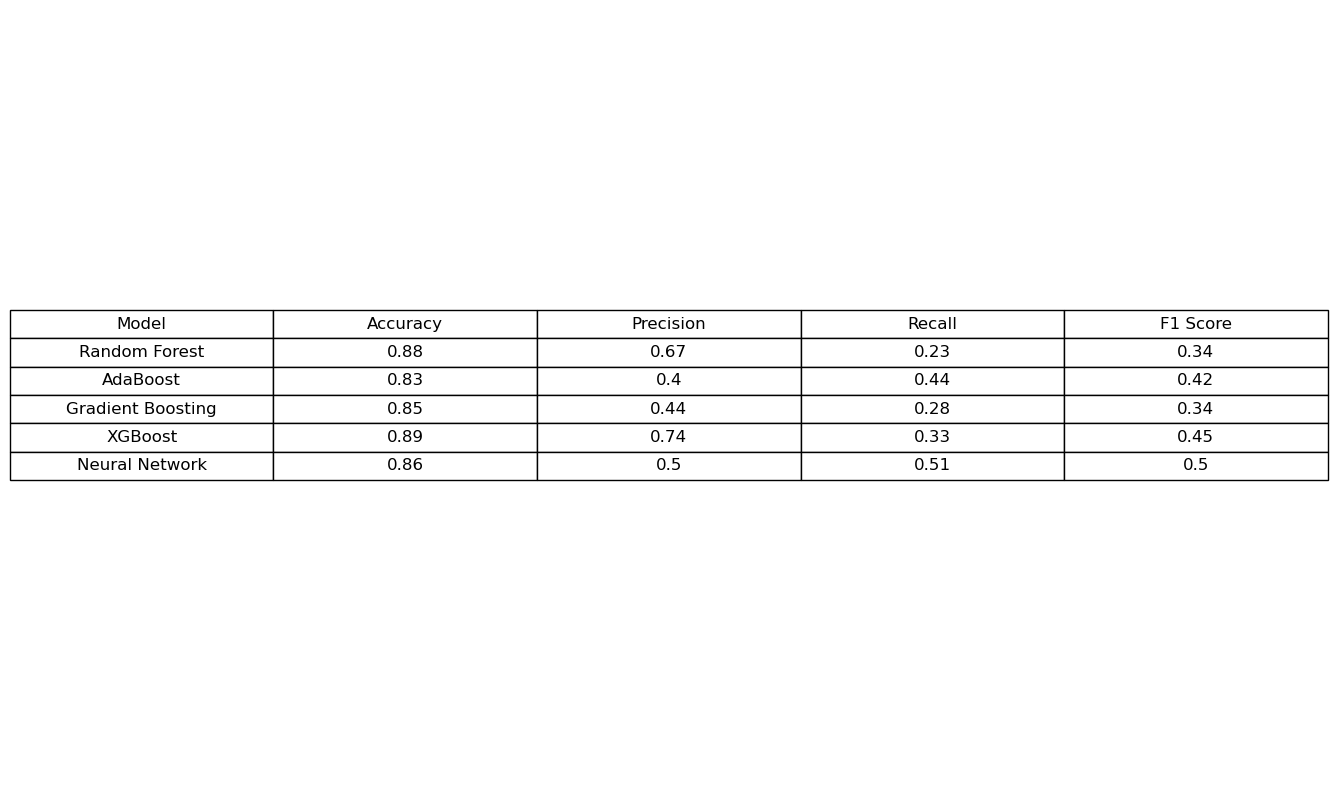

In [109]:
results_rounded = results.round(2)

fig, ax = plt.subplots(figsize=(10, 10))

ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

table = ax.table(cellText=results_rounded.values, colLabels=results_rounded.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.7, 1.7)

plt.savefig("results_table.png", bbox_inches='tight', dpi=300)

plt.show()

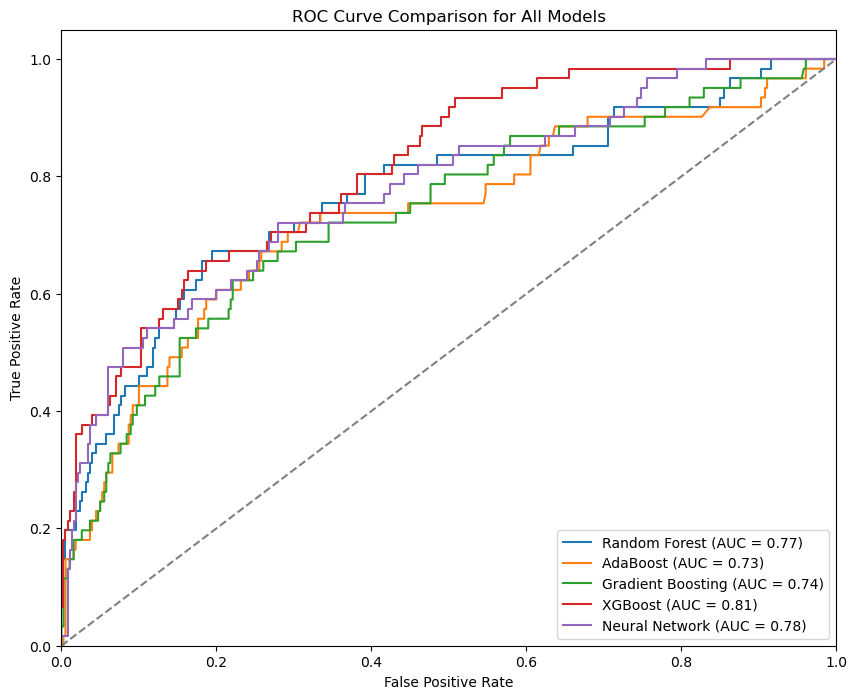

In [110]:
rf_probs = rf_grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1]
ada_probs = ada_grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1]
gb_probs = gb_grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1]
xgb_probs = xgb_grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1]
mlp_probs = mlp_grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC for each model
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)

rf_auc = auc(rf_fpr, rf_tpr)
ada_auc = auc(ada_fpr, ada_tpr)
gb_auc = auc(gb_fpr, gb_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)
mlp_auc = auc(mlp_fpr, mlp_tpr)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(ada_fpr, ada_tpr, label=f'AdaBoost (AUC = {ada_auc:.2f})')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot(mlp_fpr, mlp_tpr, label=f'Neural Network (AUC = {mlp_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for All Models')
plt.legend(loc="lower right")
plt.savefig('roc.png', dpi=300, bbox_inches='tight')
plt.show()


In [111]:
rf_auc = roc_auc_score(y_test, rf_grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1])
ada_auc = roc_auc_score(y_test, ada_grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1])
gb_auc = roc_auc_score(y_test, gb_grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1])
xgb_auc = roc_auc_score(y_test, xgb_grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1])
nn_auc = roc_auc_score(y_test, mlp_grid_search.best_estimator_.predict_proba(X_test_scaled)[:, 1])

print(f"Random Forest AUC: {rf_auc:.3f}")
print(f"AdaBoost AUC: {ada_auc:.3f}")
print(f"Gradient Boosting AUC: {gb_auc:.3f}")
print(f"XGBoost AUC: {xgb_auc:.3f}")
print(f"Neural Network AUC: {nn_auc:.3f}")


Random Forest AUC: 0.768
AdaBoost AUC: 0.731
Gradient Boosting AUC: 0.735
XGBoost AUC: 0.814
Neural Network AUC: 0.776


## Feature Importance

In [112]:
# Convert scaled numerical data back into DataFrames for easier integration
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_final.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_final.columns)

#Display the first few rows of the final scaled training dataset
X_train_scaled_df.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0  0.761905   0.734577          0.000000       0.25                 1.000000   
1  0.428571   0.081779          0.178571       0.25                 0.333333   
2  0.071429   0.168580          0.214286       0.00                 0.333333   
3  0.761905   0.820660          0.071429       0.50                 0.000000   
4  0.809524   0.639885          0.214286       0.75                 0.333333   

   HourlyRate  JobInvolvement  JobSatisfaction  MonthlyIncome  MonthlyRate  \
0    0.514286        0.666667         1.000000       0.863086     0.181530   
1    0.771429        0.666667         0.333333       0.207056     0.029111   
2    0.014286        0.666667         0.333333       0.087941     0.099297   
3    0.985714        0.666667         0.333333       0.905266     0.237101   
4    0.814286        0.666667         0.333333       0.496893     0.531138   

   ...  JobRole_Manufacturing Director  JobRole_Research Director  \
0  ...                             0.0                        1.0   
1  ...                             1.0                        0.0   
2  ...                             0.0                        0.0   
3  ...                             0.0                        0.0   
4  ...                             0.0                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         0.0                      0.0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                           0.0                     1.0   
1                           0.0                     1.0   
2                           1.0                     0.0   
3                           0.0                     0.0   
4                           0.0                     0.0   

   MaritalStatus_Married  MaritalStatus_Single  OverTime_No  OverTime_Yes  
0                    0.0                   0.0          1.0           0.0  
1                    0.0                   0.0          1.0           0.0  
2                    0.0                   1.0          1.0           0.0  
3                    1.0                   0.0          1.0           0.0  
4                    0.0                   1.0          1.0           0.0  

[5 rows x 49 columns]

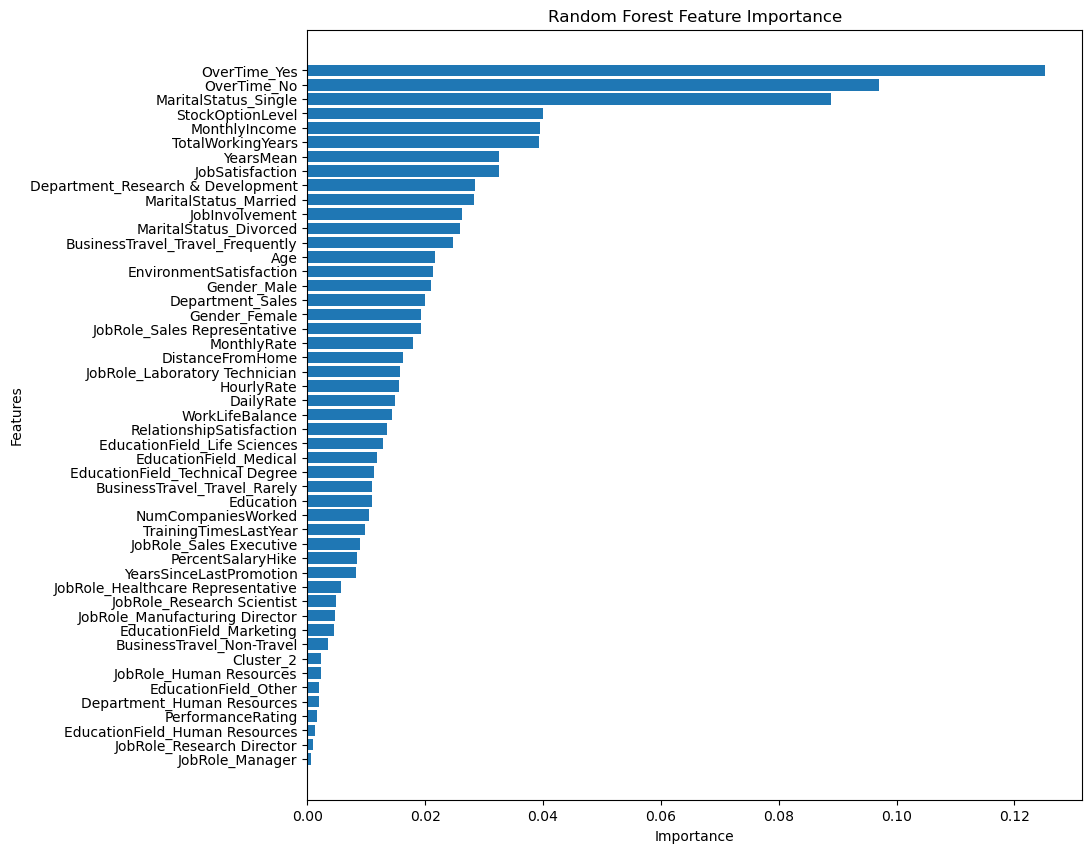

In [113]:
# Get the feature importance from the best Random Forest model
rf_feature_importance = rf_grid_search.best_estimator_.feature_importances_

rf_feature_importance_df = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Importance': rf_feature_importance
})

# Sort and plot
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 10))
plt.barh(rf_feature_importance_df['Feature'], rf_feature_importance_df['Importance'])
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.savefig('f_importance_random_forest.png', dpi=300, bbox_inches='tight')
plt.show()

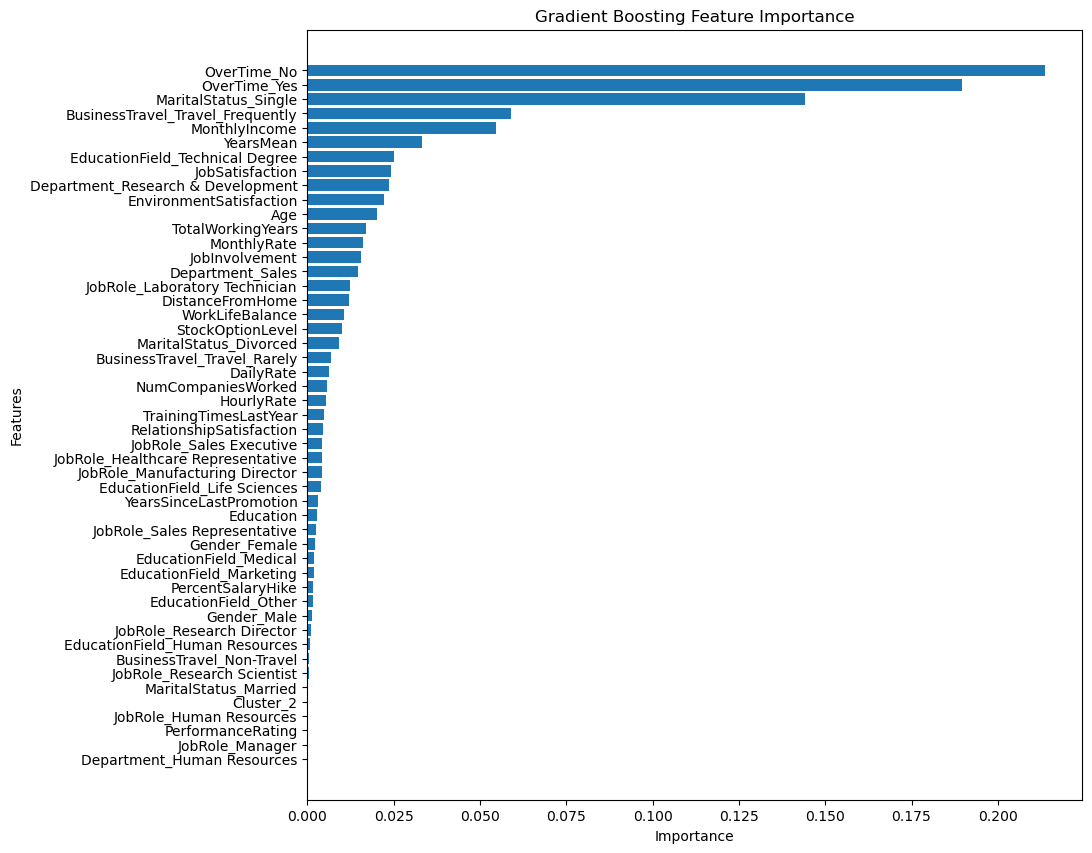

In [114]:
# Get the feature importance from the best Gradient Boosting model
gb_feature_importance = gb_grid_search.best_estimator_.feature_importances_

gb_feature_importance_df = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Importance': gb_feature_importance
})

# Sort and plot
gb_feature_importance_df = gb_feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 10))
plt.barh(gb_feature_importance_df['Feature'], gb_feature_importance_df['Importance'])
plt.title('Gradient Boosting Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()


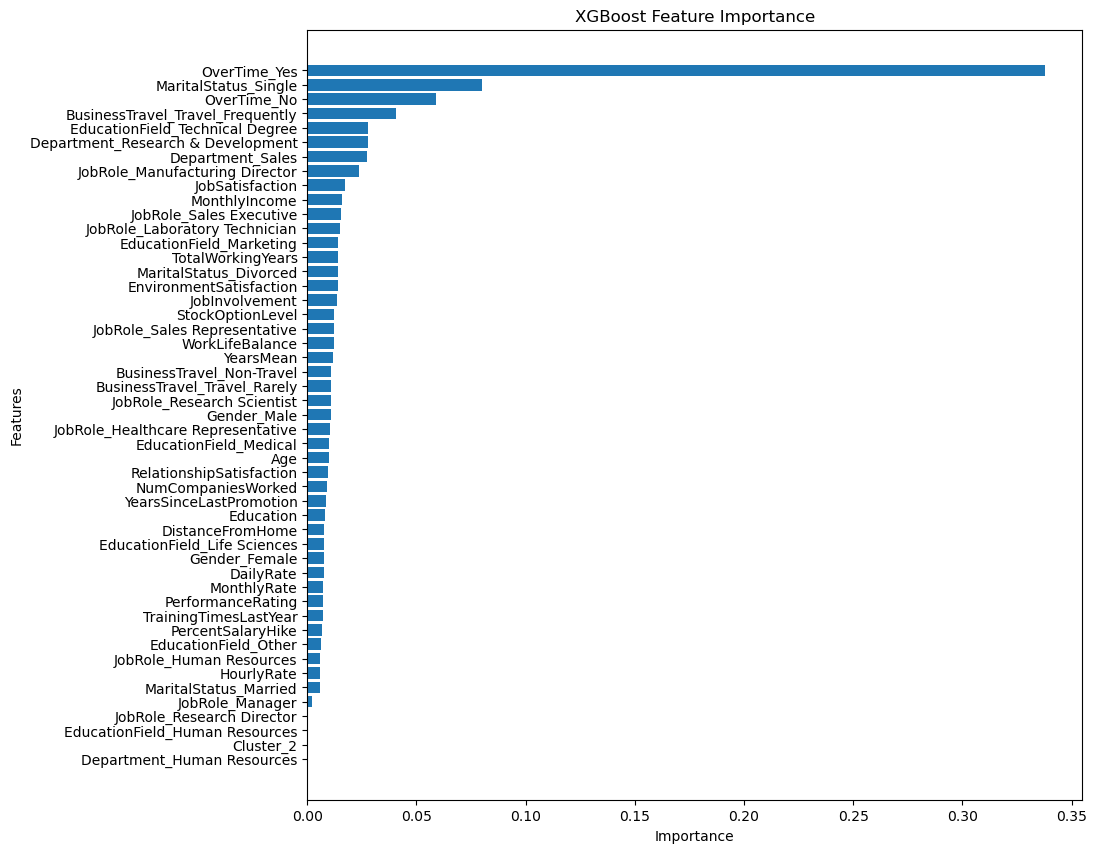

In [115]:
# Get the feature importance from the best XGBoost model
xgb_feature_importance = xgb_grid_search.best_estimator_.feature_importances_

# Create a DataFrame for better visualization
xgb_feature_importance_df = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Importance': xgb_feature_importance
})


xgb_feature_importance_df = xgb_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 10))
plt.barh(xgb_feature_importance_df['Feature'], xgb_feature_importance_df['Importance'])
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.savefig('f_importance_xgboost.png', dpi=300, bbox_inches='tight')
plt.show()

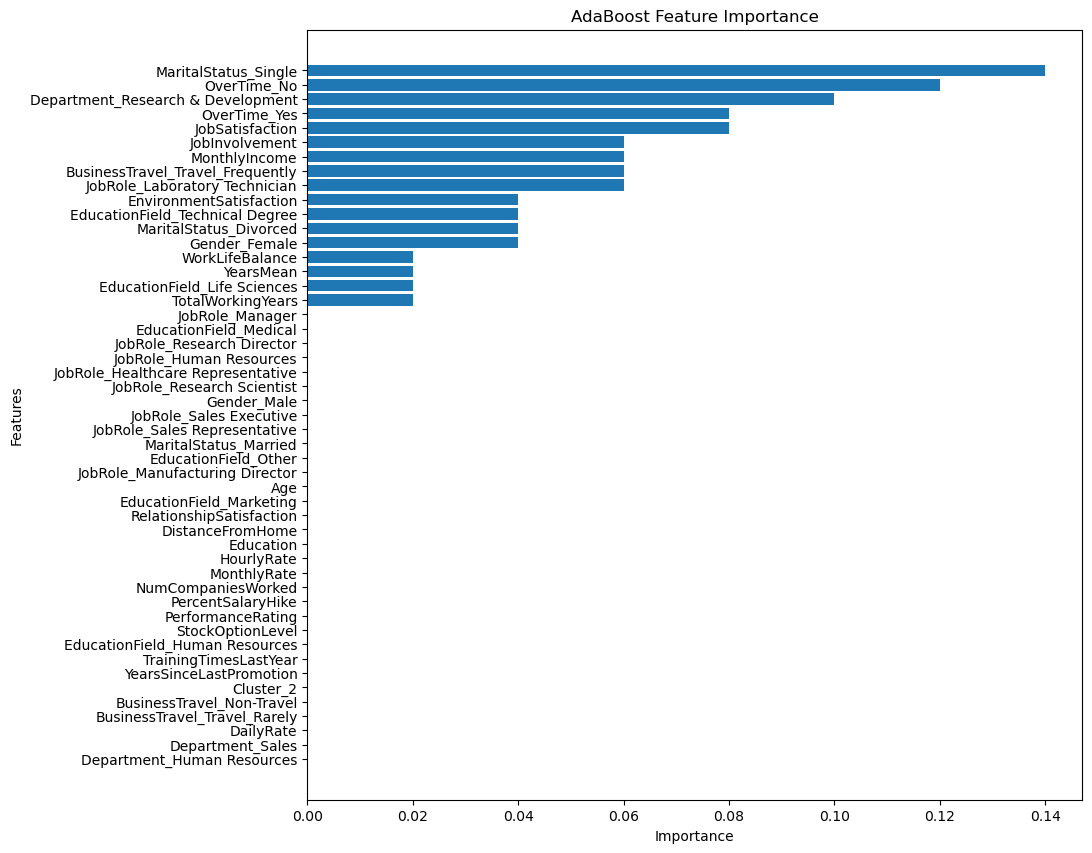

In [116]:
# Get the feature importance from the best AdaBoost model
ada_feature_importance = ada_grid_search.best_estimator_.feature_importances_

# Create a DataFrame for better visualization
ada_feature_importance_df = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Importance': ada_feature_importance
})

# Sort and plot
ada_feature_importance_df = ada_feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 10))
plt.barh(ada_feature_importance_df['Feature'], ada_feature_importance_df['Importance'])
plt.title('AdaBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

In [117]:
from sklearn.inspection import permutation_importance

best_mlp = mlp_grid_search.best_estimator_
best_mlp.fit(X_train_scaled, y_train_resampled)

result = permutation_importance(best_mlp, X_test_scaled, y_test, scoring='recall', n_repeats=10, random_state=42)

importances = pd.DataFrame(result.importances_mean, index=X_train_scaled_df.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

print(importances)

                                   Importance
OverTime_Yes                         0.109836
TotalWorkingYears                    0.086885
MonthlyIncome                        0.072131
JobSatisfaction                      0.065574
DistanceFromHome                     0.065574
YearsMean                            0.062295
JobInvolvement                       0.060656
EducationField_Life Sciences         0.054098
JobRole_Laboratory Technician        0.050820
BusinessTravel_Travel_Frequently     0.050820
Gender_Female                        0.042623
EnvironmentSatisfaction              0.040984
TrainingTimesLastYear                0.039344
RelationshipSatisfaction             0.039344
OverTime_No                          0.037705
MaritalStatus_Married                0.037705
EducationField_Technical Degree      0.037705
Age                                  0.036066
Gender_Male                          0.034426
JobRole_Sales Representative         0.031148
JobRole_Human Resources           

In [151]:
best_mlp = mlp_grid_search.best_estimator_
best_mlp.fit(X_train_scaled, y_train_resampled)

# Compute permutation importance
result = permutation_importance(best_mlp, X_test_scaled, y_test, scoring='recall', n_repeats=10, random_state=42)

# Convert to DataFrame and sort by importance
mlp_importances_df = pd.DataFrame(result.importances_mean, index=X_train_scaled_df.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Extract top 10 features for MLP
top_10_mlp_features = mlp_importances_df.index[:10].values

# Ensure MLP features are in the same format (array of feature names)
print(top_10_mlp_features)

['OverTime_Yes' 'TotalWorkingYears' 'YearsMean'
 'JobRole_Laboratory Technician' 'JobInvolvement'
 'BusinessTravel_Travel_Frequently' 'DistanceFromHome' 'WorkLifeBalance'
 'MonthlyIncome' 'EducationField_Marketing']


In [152]:
top_10_rf_features = rf_feature_importance_df['Feature'].head(10).values
top_10_gb_features = gb_feature_importance_df['Feature'].head(10).values
top_10_ada_features = ada_feature_importance_df['Feature'].head(10).values
top_10_xgb_features = xgb_feature_importance_df['Feature'].head(10).values

In [153]:
combined_top_features = list(set(top_10_rf_features) | set(top_10_gb_features) | set(top_10_ada_features) | set(top_10_xgb_features) | set(top_10_mlp_features))

print("Selected Important Features: ", combined_top_features)

Selected Important Features:  ['JobRole_Laboratory Technician', 'TotalWorkingYears', 'OverTime_Yes', 'BusinessTravel_Travel_Frequently', 'JobRole_Manufacturing Director', 'YearsMean', 'Department_Research & Development', 'DistanceFromHome', 'EducationField_Marketing', 'JobInvolvement', 'WorkLifeBalance', 'MaritalStatus_Single', 'EducationField_Technical Degree', 'EnvironmentSatisfaction', 'StockOptionLevel', 'OverTime_No', 'Department_Sales', 'MonthlyIncome', 'JobSatisfaction', 'MaritalStatus_Married']


In [154]:
# Filter the training and test datasets to keep only the top features
X_train_important = X_train_scaled_df[combined_top_features]
X_test_important = X_test_scaled_df[combined_top_features]

# Check the shapes to ensure correct filtering
print("Training set shape after filtering: ", X_train_important.shape)
print("Test set shape after filtering: ", X_test_important.shape)

Training set shape after filtering:  (1706, 20)
Test set shape after filtering:  (441, 20)


In [155]:
rf_grid_search.fit(X_train_important, y_train_resampled)
y_pred_rf = rf_grid_search.best_estimator_.predict(X_test_important)
print(classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 912 candidates, totalling 4560 fits
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       380
           1       0.53      0.28      0.37        61

    accuracy                           0.87       441
   macro avg       0.71      0.62      0.65       441
weighted avg       0.84      0.87      0.85       441



In [156]:
ada_grid_search.fit(X_train_important, y_train_resampled)
y_pred_ada = ada_grid_search.best_estimator_.predict(X_test_important)
print(classification_report(y_test, y_pred_ada))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       380
           1       0.38      0.46      0.41        61

    accuracy                           0.82       441
   macro avg       0.64      0.67      0.65       441
weighted avg       0.84      0.82      0.83       441



In [157]:
gb_grid_search.fit(X_train_important, y_train_resampled)
y_pred_gb = gb_grid_search.best_estimator_.predict(X_test_important)
print(classification_report(y_test, y_pred_gb))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       380
           1       0.46      0.28      0.35        61

    accuracy                           0.85       441
   macro avg       0.68      0.61      0.63       441
weighted avg       0.83      0.85      0.84       441



In [158]:
xgb_grid_search.fit(X_train_important, y_train_resampled)
y_pred_xgb = xgb_grid_search.best_estimator_.predict(X_test_important)
print(classification_report(y_test, y_pred_xgb))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       380
           1       0.53      0.34      0.42        61

    accuracy                           0.87       441
   macro avg       0.71      0.65      0.67       441
weighted avg       0.85      0.87      0.85       441



In [159]:
mlp_grid_search.fit(X_train_important, y_train_resampled)
y_pred_mlp = mlp_grid_search.best_estimator_.predict(X_test_important)
print(classification_report(y_test, y_pred_mlp))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       380
           1       0.44      0.46      0.45        61

    accuracy                           0.84       441
   macro avg       0.67      0.68      0.68       441
weighted avg       0.85      0.84      0.85       441



In [160]:
new_results = pd.DataFrame({  
    'Model': ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'Neural Network'],
    'Accuracy': [
        get_metrics(rf_grid_search.best_estimator_, X_test_important, y_test)['Accuracy'],
        get_metrics(ada_grid_search.best_estimator_, X_test_important, y_test)['Accuracy'],  
        get_metrics(gb_grid_search.best_estimator_, X_test_important, y_test)['Accuracy'],
        get_metrics(xgb_grid_search.best_estimator_, X_test_important, y_test)['Accuracy'],
        get_metrics(mlp_grid_search.best_estimator_, X_test_important, y_test)['Accuracy']
    ],
    'Precision': [
        get_metrics(rf_grid_search.best_estimator_, X_test_important, y_test)['Precision'],
        get_metrics(ada_grid_search.best_estimator_, X_test_important, y_test)['Precision'],  
        get_metrics(gb_grid_search.best_estimator_, X_test_important, y_test)['Precision'],
        get_metrics(xgb_grid_search.best_estimator_, X_test_important, y_test)['Precision'],
        get_metrics(mlp_grid_search.best_estimator_, X_test_important, y_test)['Precision']
    ],
    'Recall': [
        get_metrics(rf_grid_search.best_estimator_, X_test_important, y_test)['Recall'],
        get_metrics(ada_grid_search.best_estimator_, X_test_important, y_test)['Recall'],  
        get_metrics(gb_grid_search.best_estimator_, X_test_important, y_test)['Recall'],
        get_metrics(xgb_grid_search.best_estimator_, X_test_important, y_test)['Recall'],
        get_metrics(mlp_grid_search.best_estimator_, X_test_important, y_test)['Recall']
    ],
    'F1 Score': [
        get_metrics(rf_grid_search.best_estimator_, X_test_important, y_test)['F1 Score'],
        get_metrics(ada_grid_search.best_estimator_, X_test_important, y_test)['F1 Score'],  
        get_metrics(gb_grid_search.best_estimator_, X_test_important, y_test)['F1 Score'],
        get_metrics(xgb_grid_search.best_estimator_, X_test_important, y_test)['F1 Score'],
        get_metrics(mlp_grid_search.best_estimator_, X_test_important, y_test)['F1 Score']
    ]
})
new_results


Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.866213   0.531250  0.278689  0.365591
1           AdaBoost  0.820862   0.378378  0.459016  0.414815
2  Gradient Boosting  0.854875   0.459459  0.278689  0.346939
3            XGBoost  0.866213   0.525000  0.344262  0.415842
4     Neural Network  0.843537   0.437500  0.459016  0.448000

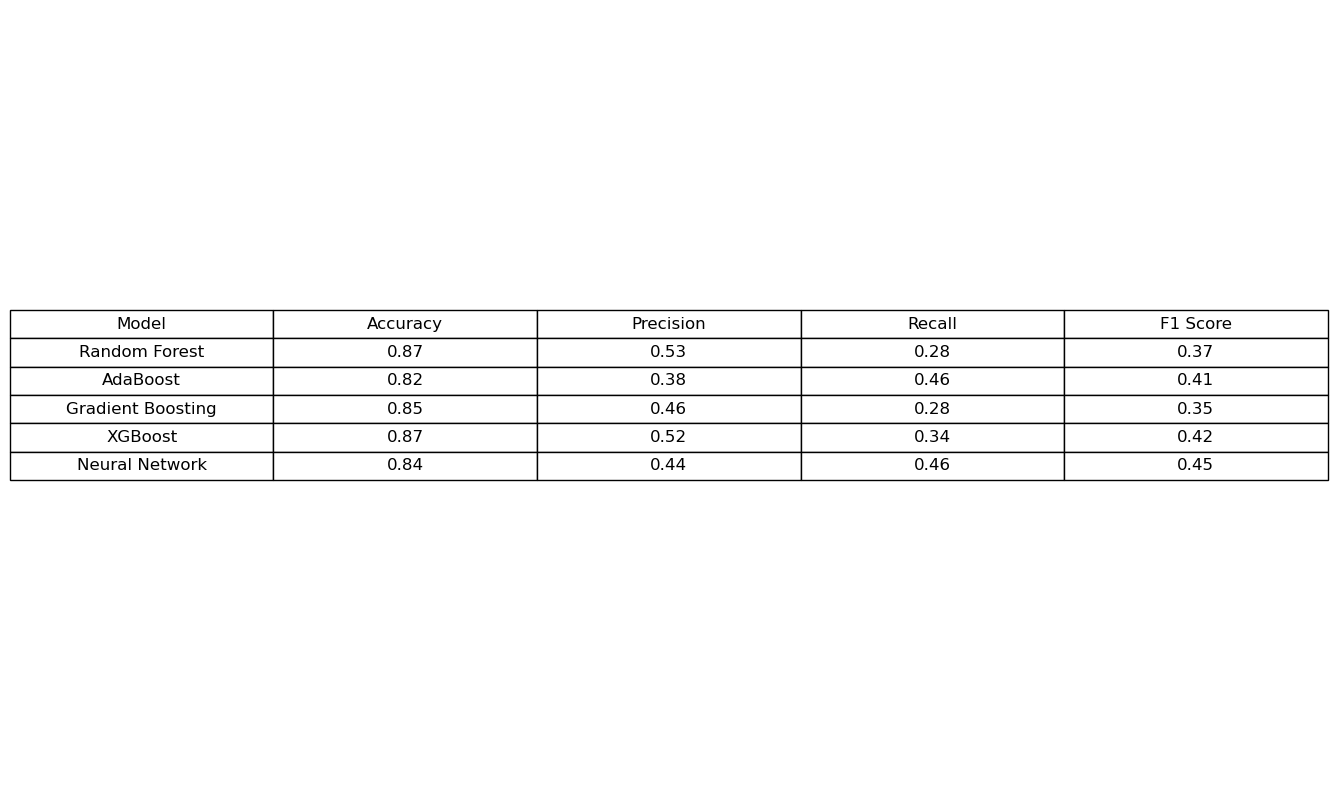

In [161]:
new_results_rounded = new_results.round(2)

fig, ax = plt.subplots(figsize=(10, 10))

ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

table = ax.table(cellText=new_results_rounded.values, colLabels=new_results_rounded.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.7, 1.7)

plt.savefig("new_results_table.png", bbox_inches='tight', dpi=300)

plt.show()

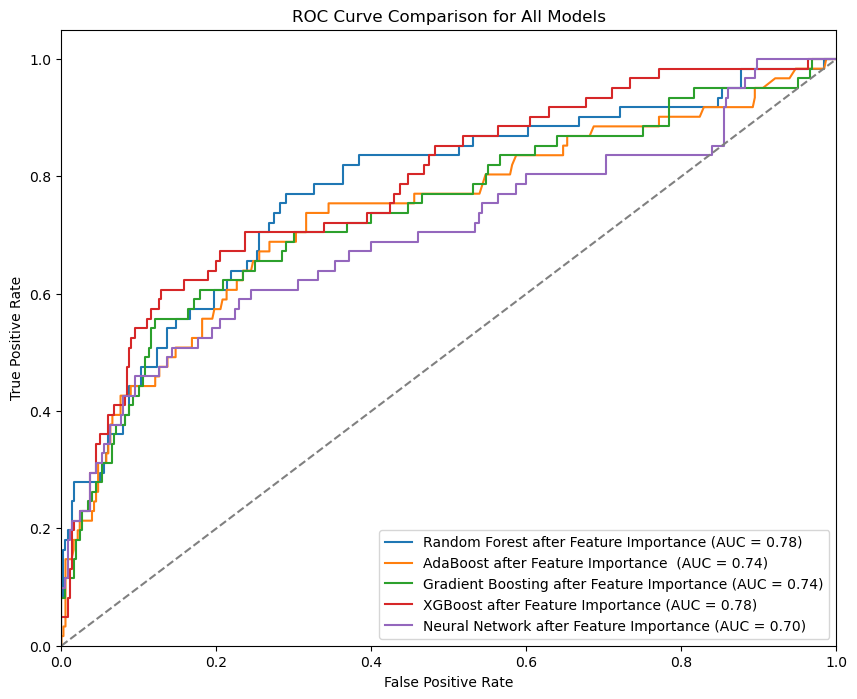

In [169]:
rf_probs_important = rf_grid_search.best_estimator_.predict_proba(X_test_important)[:, 1]
ada_probs_important= ada_grid_search.best_estimator_.predict_proba(X_test_important)[:, 1]
gb_probs_important = gb_grid_search.best_estimator_.predict_proba(X_test_important)[:, 1]
xgb_probs_important = xgb_grid_search.best_estimator_.predict_proba(X_test_important)[:, 1]
mlp_probs_important = mlp_grid_search.best_estimator_.predict_proba(X_test_important)[:, 1]

# Calculate ROC curve and AUC for each model
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs_important)
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_probs_important)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs_important)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs_important)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs_important)

rf_auc = auc(rf_fpr, rf_tpr)
ada_auc = auc(ada_fpr, ada_tpr)
gb_auc = auc(gb_fpr, gb_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)
mlp_auc = auc(mlp_fpr, mlp_tpr)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest after Feature Importance (AUC = {rf_auc:.2f})')
plt.plot(ada_fpr, ada_tpr, label=f'AdaBoost after Feature Importance  (AUC = {ada_auc:.2f})')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting after Feature Importance (AUC = {gb_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost after Feature Importance (AUC = {xgb_auc:.2f})')
plt.plot(mlp_fpr, mlp_tpr, label=f'Neural Network after Feature Importance (AUC = {mlp_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for All Models')
plt.legend(loc="lower right")
plt.savefig('roc.png', dpi=300, bbox_inches='tight')
plt.show()


In [162]:
results['Type'] = 'Before Feature Selection'
new_results['Type'] = 'After Feature Selection'

comparison = pd.concat([results, new_results], ignore_index=True)

comparison = comparison[['Type', 'Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']]

comparison

Type              Model  Accuracy  Precision    Recall  \
0  Before Feature Selection      Random Forest  0.877551   0.666667  0.229508   
1  Before Feature Selection           AdaBoost  0.829932   0.397059  0.442623   
2  Before Feature Selection  Gradient Boosting  0.850340   0.435897  0.278689   
3  Before Feature Selection            XGBoost  0.891156   0.740741  0.327869   
4  Before Feature Selection     Neural Network  0.861678   0.500000  0.508197   
5   After Feature Selection      Random Forest  0.866213   0.531250  0.278689   
6   After Feature Selection           AdaBoost  0.820862   0.378378  0.459016   
7   After Feature Selection  Gradient Boosting  0.854875   0.459459  0.278689   
8   After Feature Selection            XGBoost  0.866213   0.525000  0.344262   
9   After Feature Selection     Neural Network  0.843537   0.437500  0.459016   

   F1 Score  
0  0.341463  
1  0.418605  
2  0.340000  
3  0.454545  
4  0.504065  
5  0.365591  
6  0.414815  
7  0.346939  
8  0.415842  
9  0.448000

In [163]:
comparison_pivot = comparison.pivot_table(index='Model', columns='Type', values=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display the pivoted comparison
comparison_pivot

Accuracy                           \
Type              After Feature Selection Before Feature Selection   
Model                                                                
AdaBoost                         0.820862                 0.829932   
Gradient Boosting                0.854875                 0.850340   
Neural Network                   0.843537                 0.861678   
Random Forest                    0.866213                 0.877551   
XGBoost                          0.866213                 0.891156   

                                 F1 Score                           \
Type              After Feature Selection Before Feature Selection   
Model                                                                
AdaBoost                         0.414815                 0.418605   
Gradient Boosting                0.346939                 0.340000   
Neural Network                   0.448000                 0.504065   
Random Forest                    0.365591                 0.341463   
XGBoost                          0.415842                 0.454545   

                                Precision                           \
Type              After Feature Selection Before Feature Selection   
Model                                                                
AdaBoost                         0.378378                 0.397059   
Gradient Boosting                0.459459                 0.435897   
Neural Network                   0.437500                 0.500000   
Random Forest                    0.531250                 0.666667   
XGBoost                          0.525000                 0.740741   

                                   Recall                           
Type              After Feature Selection Before Feature Selection  
Model                                                               
AdaBoost                         0.459016                 0.442623  
Gradient Boosting                0.278689                 0.278689  
Neural Network                   0.459016                 0.508197  
Random Forest                    0.278689                 0.229508  
XGBoost                          0.344262                 0.327869